# MIE1624 - Course Project: Education Analytics 

<b>Submitted by:</b> Group 20, <b>Submitted to:</b> Dr. O. Romanko, <b>Submitted on:</b> March 30th, 2020

<b>Group 20:</b> Stephanie Anagnostou, Taylr Cawte, Sam Cherniak, Eileen Mendoza, Erfan Primorad

## Problem Statement 
The investigation within attempts to use data science and analytics to achieve the below objectives:

* Exploratory Analysis; visualize and explore trends in the compiled data sets
* Part 1; design an introductory data science and analytics course
* Part 2; design a technical/business oriented Master of Data Science program
* Part 3; build framework for an education technology company

The goal of this project is to increase the potential for a student to achieve gainful employment as a data scientist. The course curriculum/program structure are designed using job description data from potential employers and course structure data from established data science programs. The proposed education technology company is intended to improve the likelihood an applicant will be successful in their job search.   

It should be noted that visualizations for the courses, program structure, and program sequence are provided within parts 1 and 2. It should also be noted that indivdual notebooks were created to address each part of the above problem statement seperately and recompiled into a single notebook for ease of reporting. For this reason multiple import statements and variable declarations are common.



## Data Sources and Collection 

### Job Posting Data 

The job posting data was collected as a single data set titled "10000 Data Scientist Job Postings from the USA" from Kaggle. This data set contains a multitude of information including job title, type, and description as well as information on the employer, location, and job board from which the original posting was taken.

By using Job posting data this investigation was able to identify skills which employers were most in need of, and design courses according to those skills. It should be noted that this investigation focused on job postings in America as the United States is one of the most powerful economies in the world and is a leader in the field of data science. This can especially be seen when considering the rapid expansion of silicon valley. 

### Kaggle Survey Data

The Kaggle survey data was cleaned and explored to gather insights into the skills and experience data science professionals practice in their current real world jobs. 

A list of questions related to Data Science And Analytic skills and requirements were answered using the data to develop insights. The results are presented visually for better interpretation of results. From these results, insights for the course and master program were inferred for the design of data science courses and curriculum. 

### Course Curriculum Data

The course data was collected from a variety of resources. Two course datasets from Kaggle with information on data science courses offered by Data-Camp and Harvard/MIT were downloaded. These data sets can be found on Kaggle under "DataCamp Courses" and "Online Courses from Harvard and MIT". The remainder of the course data was scraped from various academic institution course calendars for data science focused programs using the "webscraper tool", a google chrom extension.

Instructions on how to use the webscraper tool can be found at the below link. It should be noted that the output file for the webscraper tool is a csv containing the scraped data, this scraped data was subsequently cleaned and processed for use in the course and program development. 

https://www.webscraper.io/ <-- online webscraping tool 

To identify and select current courses from the University of Toronto that will best fit the program, graduate school course calendars were web scraped. The web scraping code is commented out but is explained in the written code in the later sections.

## Initialize Environment

The below code downloads all files, mounts drive, and does an initial import so that the code can be run on google colab. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load files from drive, unnecessarily complicated
file_id = '1hDLd7Pr5NZiDugqDC6_R761XCN_6e83C'
downloaded = drive.CreateFile({'id': file_id})
downloaded = drive.CreateFile({'id':'1hDLd7Pr5NZiDugqDC6_R761XCN_6e83C'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data_scientist_united_states_job_postings_jobspikr.csv')

file_id2 = '1AVJOUNpygcyMJ-vwCGWtwqU-tp2U59h-'
downloaded2 = drive.CreateFile({'id': file_id})
downloaded2 = drive.CreateFile({'id':'1AVJOUNpygcyMJ-vwCGWtwqU-tp2U59h-'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('coursePickle.pickle')

file_id3 = '1djpMfR-2ELdZb_hHk9g2hj8bzGtUdnV-'
downloaded3 = drive.CreateFile({'id': file_id})
downloaded3 = drive.CreateFile({'id':'1djpMfR-2ELdZb_hHk9g2hj8bzGtUdnV-'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('CourseCluster.gv-1.png')

file_id4 = '1EEX1GOM6UMTT5ziUBmgulW7L4LRnrEtn'
downloaded4 = drive.CreateFile({'id': file_id})
downloaded4 = drive.CreateFile({'id':'1EEX1GOM6UMTT5ziUBmgulW7L4LRnrEtn'}) # replace the id with id of file you want to access
downloaded4.GetContentFile('stop_words.txt')

file_id5 = '14gGoWChZGUFPbqWI0HCLXxeeZwBiTNyE'
downloaded5 = drive.CreateFile({'id': file_id})
downloaded5 = drive.CreateFile({'id':'14gGoWChZGUFPbqWI0HCLXxeeZwBiTNyE'}) # replace the id with id of file you want to access
downloaded5.GetContentFile('courses.csv')

file_id6 = '1ecIs9UTYovt5wEOjZaNvtVeEGefkmjJp'
downloaded6 = drive.CreateFile({'id': file_id})
downloaded6 = drive.CreateFile({'id':'1ecIs9UTYovt5wEOjZaNvtVeEGefkmjJp'}) # replace the id with id of file you want to access
downloaded6.GetContentFile('CSCcourses.csv')

file_id7 = '1dEM2nDJa0VvVcMATMMBY8e8uzmUs_ZkZ'
downloaded7 = drive.CreateFile({'id': file_id})
downloaded7 = drive.CreateFile({'id':'1dEM2nDJa0VvVcMATMMBY8e8uzmUs_ZkZ'}) # replace the id with id of file you want to access
downloaded7.GetContentFile('data_analyst.png')

file_id8 = '1CHVlBmGSH0yZRzJm-qkA3NiRY8Ds22Ch'
downloaded8 = drive.CreateFile({'id': file_id})
downloaded8 = drive.CreateFile({'id':'1CHVlBmGSH0yZRzJm-qkA3NiRY8Ds22Ch'}) # replace the id with id of file you want to access
downloaded8.GetContentFile('data_science.png')

file_id9 = '1fB2GqIdIZWBUcg0r0tddXzw6xCFAHClO'
downloaded9 = drive.CreateFile({'id': file_id})
downloaded9 = drive.CreateFile({'id':'1fB2GqIdIZWBUcg0r0tddXzw6xCFAHClO'}) # replace the id with id of file you want to access
downloaded9.GetContentFile('jobs2.csv')

file_id10 = '18yRfxh4rlM08TAqeM133kGOVKJSQEkh8'
downloaded10 = drive.CreateFile({'id': file_id})
downloaded10 = drive.CreateFile({'id':'18yRfxh4rlM08TAqeM133kGOVKJSQEkh8'}) # replace the id with id of file you want to access
downloaded10.GetContentFile('MIEcourses.csv')

file_id11 = '1K9BKEFIL8u7ochPWlk75HP4b3S_YPJar'
downloaded11 = drive.CreateFile({'id': file_id})
downloaded11 = drive.CreateFile({'id':'1K9BKEFIL8u7ochPWlk75HP4b3S_YPJar'}) # replace the id with id of file you want to access
downloaded11.GetContentFile('RSMcourses.csv')

file_id12 = '1SSvx5XcdPoWGgCXKHr3PfX6llXMq9p5L'
downloaded12 = drive.CreateFile({'id': file_id})
downloaded12 = drive.CreateFile({'id':'1SSvx5XcdPoWGgCXKHr3PfX6llXMq9p5L'}) # replace the id with id of file you want to access
downloaded12.GetContentFile('skill_distribution_data_analyst.PNG')

file_id13 = '1IQz2zQqjwODrjBfOsMFF_DvXYL0HdcNs'
downloaded13 = drive.CreateFile({'id': file_id})
downloaded13 = drive.CreateFile({'id':'1IQz2zQqjwODrjBfOsMFF_DvXYL0HdcNs'}) # replace the id with id of file you want to access
downloaded13.GetContentFile('skill_distribution_data_scientist.PNG')

file_id14 = '1-hijynF-J-JiaWEbqdH7jncjGAanEq88'
downloaded14 = drive.CreateFile({'id': file_id})
downloaded14 = drive.CreateFile({'id':'1-hijynF-J-JiaWEbqdH7jncjGAanEq88'}) # replace the id with id of file you want to access
downloaded14.GetContentFile('Kaggle_Salary.csv')

file_id15 = '1J2Rj3AuNmhSjp4LyT3p2EBsySo5iyZzh'
downloaded15 = drive.CreateFile({'id': file_id})
downloaded15 = drive.CreateFile({'id':'1J2Rj3AuNmhSjp4LyT3p2EBsySo5iyZzh'}) # replace the id with id of file you want to access
downloaded15.GetContentFile('ECEcourses.csv')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from nltk.stem import SnowballStemmer
from graphviz import Graph
import os
from PIL import Image
import re
from sklearn.cluster import KMeans
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
from IPython.display import HTML
import lxml.html as lh

warnings.filterwarnings('ignore')

jobs = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
courses = pd.read_pickle('coursePickle.pickle')

import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Exploratory Analysis

### Job Posting Data 
An exploratory analysis is conducted on the collected data to provide insight into the requirements of employers currently hiring in the data science field. These insights will help build the basis for which the data science courses are built in later sections. At the end of this section a short discussion on the important information gained from the explored data is provided. 

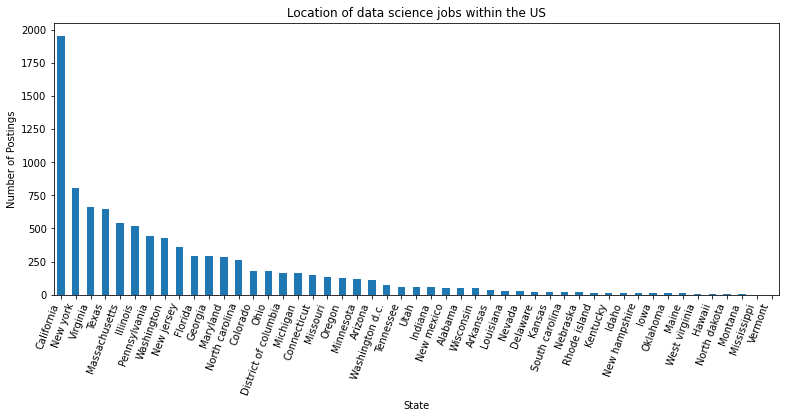

In [6]:
plt.figure(figsize=(13,5))
g = jobs['inferred_state'].value_counts().plot(kind='bar')
g.set_xticklabels(g.get_xticklabels(), rotation=70, horizontalalignment='right')
plt.xlabel('State')
plt.ylabel('Number of Postings')
plt.title('Location of data science jobs within the US')
plt.show()

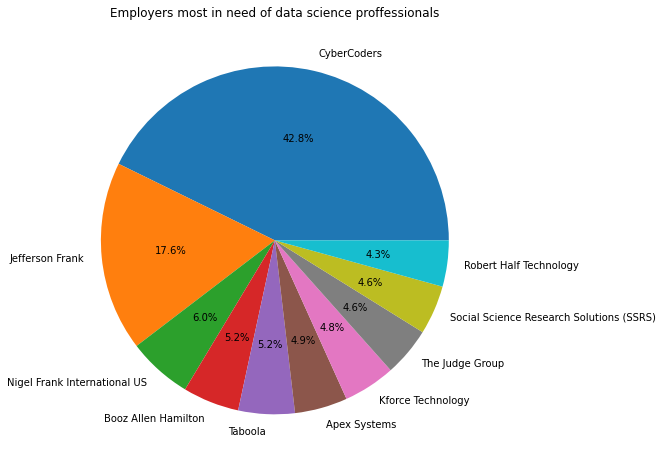

In [7]:
plt.figure(figsize=(8, 8))
g = jobs['company_name'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('')
plt.title('Employers most in need of data science proffessionals')
plt.show()

In [8]:
# check top 10 most advertized job categories
jobs['category'].value_counts()[:10].head(10)

Computer-or-internet                 1505
computer jobs                         911
life physical and social science      758
Engineering-or-architecture           729
Manufacturing-or-mechanical           632
business and financial operations     616
math jobs                             582
Computer/Internet                     467
Engineering/Architecture              324
Data Scientist                        223
Name: category, dtype: int64

In [0]:
# it can be seen that there are several categories which overlap with eachother, in order to provide easier 
# visualizaiton, the categoreis are refined
jobs['category'][jobs['category'] == 'Computer-or-internet'] = 'Computer/Internet'
jobs['category'][jobs['category'] == 'computer jobs'] = 'Computer/Internet'
jobs['category'][jobs['category'] == 'Engineering-or-architecture'] = 'Engineering/Architecture'
jobs['category'][jobs['category'] == 'architecture and engineering'] = 'Engineering/Architecture'
jobs['category'][jobs['category'] == 'Manufacturing-or-mechanical'] = 'Manufacturing/Mechanical'
jobs['category'][jobs['category'] == 'Accounting-or-finance'] = 'Accounting/Finance'
jobs['category'][jobs['category'] == 'business and financial operations'] = 'Accounting/Finance'
jobs['category'][jobs['category'] == 'math jobs'] = 'Data Scientist'
jobs['category'][jobs['category'] == 'life physical and social science'] = 'Life and Social Science'

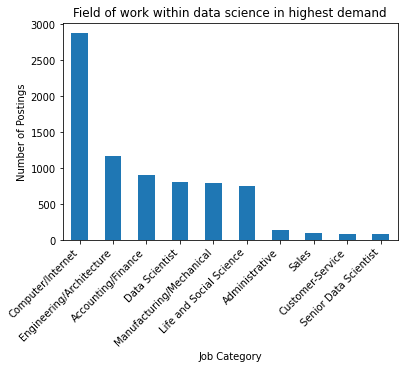

In [10]:
# number of jobs by category
plt.figure()
g2 = jobs['category'].value_counts()[:10].plot(kind='bar')
g2.set_xticklabels(g2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Job Category')
plt.ylabel('Number of Postings')
plt.title('Field of work within data science in highest demand')
plt.show()

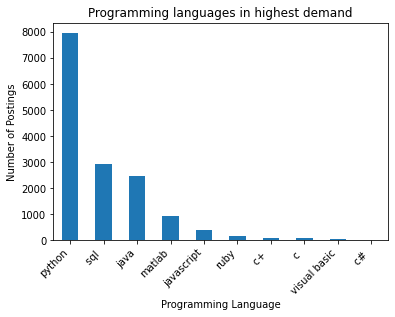

In [11]:
# most saught after programming language
jobs['job_description'] = jobs['job_description'].str.lower()
languages = ['java', ' c ', 'python', ' c# ', ' sql ', 'ruby', 'javascript', 'matlab', 'visual basic', ' c+ ']
langCounts = {}

for lang in languages:
    langCounts[lang] = jobs.job_description.str.contains(lang).sum()

g3 = pd.DataFrame.from_dict(langCounts, orient='index').sort_values(by=0, ascending=False).plot(kind='bar', legend=False)
g3.set_xticklabels(g3.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Programming Language')
plt.ylabel('Number of Postings')
plt.title('Programming languages in highest demand')
plt.show()

Important information from the above figures: 
* California, New york, and Virginia are the states which are hiring the most amount of proffessionals in the field of data science 
* Within the United states the companies hiring the most data science professionsals are CyberCoders, Jefferson Frank, and Nigel Frank International US
* The data science jobs which are in most demand have to do with computer skills, engineering, and accounting/finance
* The most in demand programming languages are python, sql, and java 

The location and employer data are not directly actionable but do provide important information on who and where the most hirings occur for data science proffessionals. By providing this information to a customer or colleague it could be used to make an informed decision on which firm and where in the country data science proffessionals are in most demand. If the end goal of getting an education is gainful employment then these factors are particularly important. 

The information on job category illustrates that the most in demand data science jobs primarily involve computer skills and engineering concepts, and accounting and finance. These job categories illustrate that the most in demand data science job require primarily technical work, however, the successful applicant will also be required to exhibit soft skills that are valuable in the business environment. This is important as it provides information for which the course structures can be built off of in later sections.

From the programming languages plot is plain to see that the most in demand programming language is python. For this reason  the introductory data science course will be taught exclusively in python and the Master of Data Science programming will have a heavy focus on python. 

### Kaggle Survey Data

For this specific analysis, only results from North American respondents were investigated.


In [0]:
df = pd.read_csv("Kaggle_Salary.csv", low_memory = False)
dfa = df[df['Q3'].isin(['Canada','United States of America'])].drop(['Q5_OTHER_TEXT', 'Q9_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q25_OTHER_TEXT'], axis=1)
dfa = dfa.drop(['Q9_Part_8', 'Q9_Part_7', 'Q25_Part_7'], axis=1)
dfb = dfa.loc[df['Q5'] != 'Other', ]

What are the job titles of the survey respondents?

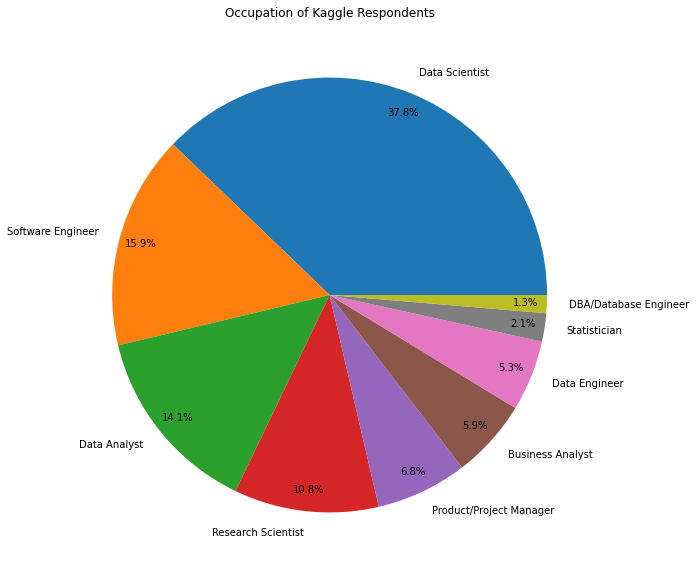

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

jobtitles = dfb[dfb.columns[pd.Series(dfb.columns).str.match('Q5')]]
jobtitles = jobtitles.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
jobtitles_data = jobtitles.data.value_counts(normalize=True)

titles = []
counts = []
others = 0

for key in list(jobtitles_data.keys()):
   
    if jobtitles_data[key] > 0.01:
        titles.append(key)
        counts.append(jobtitles_data[key])
    else:
        others += jobtitles_data[key]

ax.pie(counts, labels=titles, autopct='%1.1f%%', pctdistance = 0.9)
ax.set_title('Occupation of Kaggle Respondents')

plt.show()

From here, these different job titles will be bucketed into two or three different categories based on activities that make up an important part of their role at work.

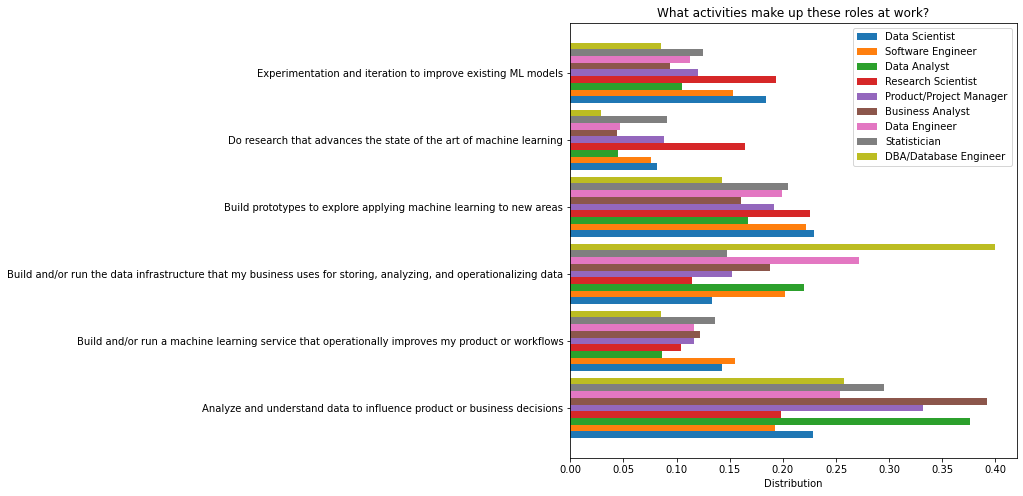

In [14]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

dfc = dfb #.drop(columns='Q9_Part_8', axis=1)
df_ds = dfc.loc[dfc['Q5'] == 'Data Scientist', ]
df_se = dfc.loc[dfc['Q5'] == 'Software Engineer', ] 
df_da = dfc.loc[dfc['Q5'] == 'Data Analyst', ] 
df_rs = dfc.loc[dfc['Q5'] == 'Research Scientist', ]
df_pm = dfc.loc[dfc['Q5'] == 'Product/Project Manager', ]
df_ba = dfc.loc[dfc['Q5'] == 'Business Analyst', ]
df_de = dfc.loc[dfc['Q5'] == 'Data Engineer', ]
df_st = dfc.loc[dfc['Q5'] == 'Statistician', ]
df_dba = dfc.loc[dfc['Q5'] == 'DBA/Database Engineer', ]

activities = dfb[dfb.columns[pd.Series(dfb.columns).str.startswith('Q9')]]
activities = activities.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_data = activities.data.value_counts(normalize=True)

activities_ds = df_ds[df_ds.columns[pd.Series(df_ds.columns).str.startswith('Q9')]]
activities_ds = activities_ds.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_dsdata = activities_ds.data.value_counts(normalize=True)

activities_se = df_se[df_se.columns[pd.Series(df_se.columns).str.startswith('Q9')]]
activities_se = activities_se.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_sedata = activities_se.data.value_counts(normalize=True)

activities_da = df_da[df_da.columns[pd.Series(df_da.columns).str.startswith('Q9')]]
activities_da = activities_da.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_dadata = activities_da.data.value_counts(normalize=True)

activities_rs = df_rs[df_rs.columns[pd.Series(df_rs.columns).str.startswith('Q9')]]
activities_rs = activities_rs.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_rsdata = activities_rs.data.value_counts(normalize=True)

activities_pm = df_pm[df_pm.columns[pd.Series(df_pm.columns).str.startswith('Q9')]]
activities_pm = activities_pm.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_pmdata = activities_pm.data.value_counts(normalize=True)

activities_ba = df_ba[df_ba.columns[pd.Series(df_ba.columns).str.startswith('Q9')]]
activities_ba = activities_ba.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_badata = activities_ba.data.value_counts(normalize=True)

activities_de = df_de[df_de.columns[pd.Series(df_de.columns).str.startswith('Q9')]]
activities_de = activities_de.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_dedata = activities_de.data.value_counts(normalize=True)

activities_st = df_st[df_st.columns[pd.Series(df_st.columns).str.startswith('Q9')]]
activities_st = activities_st.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_stdata = activities_st.data.value_counts(normalize=True)

activities_dba = df_dba[df_dba.columns[pd.Series(df_dba.columns).str.startswith('Q9')]]
activities_dba = activities_dba.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
activities_dbadata = activities_dba.data.value_counts(normalize=True)

activities_sort = sorted(dict(activities_data), key=lambda x:x.lower())

activities_sort

ds_activities = []
se_activities = []
da_activities = []
rs_activities = []
pm_activities = []
ba_activities = []
de_activities = []
st_activities = []
dba_activities = []

for key in activities_sort:
    
    try:
        ds_activities.append(dict(activities_dsdata)[key])
    except:
        ds_activities.append(0)
    try:
        se_activities.append(dict(activities_sedata)[key])
    except:
        se_activities.append(0)
    try:
        da_activities.append(dict(activities_dadata)[key])
    except:
        da_activities.append(0)
    try:
        rs_activities.append(dict(activities_rsdata)[key])
    except:
        rs_activities.append(0)
    try:
        pm_activities.append(dict(activities_pmdata)[key])
    except:
        pm_activities.append(0)
    try:
        ba_activities.append(dict(activities_badata)[key])
    except:
        ba_activities.append(0)
    try:
        de_activities.append(dict(activities_dedata)[key])
    except:
        de_activities.append(0)
    try:
        st_activities.append(dict(activities_stdata)[key])
    except:
        st_activities.append(0)
    try:
        dba_activities.append(dict(activities_dbadata)[key])
    except:
        dba_activities.append(0)
        
activities_pos = np.arange(len(activities_sort))

ax.barh(activities_pos-0.4, ds_activities, height = 0.1, label = 'Data Scientist')
ax.barh(activities_pos-0.3, se_activities, height = 0.1, label = 'Software Engineer')
ax.barh(activities_pos-0.2, da_activities, height = 0.1, label = 'Data Analyst')
ax.barh(activities_pos-0.1, rs_activities, height = 0.1, label = 'Research Scientist')
ax.barh(activities_pos+0.0, pm_activities, height = 0.1, label = 'Product/Project Manager')
ax.barh(activities_pos+0.1, ba_activities, height = 0.1, label = 'Business Analyst')
ax.barh(activities_pos+0.2, de_activities, height = 0.1, label = 'Data Engineer')
ax.barh(activities_pos+0.3, st_activities, height = 0.1, label = 'Statistician')
ax.barh(activities_pos+0.4, dba_activities, height = 0.1, label = 'DBA/Database Engineer')

ax.legend()
ax.set_title('What activities make up these roles at work?')
ax.set_xlabel('Distribution')
plt.yticks(activities_pos, activities_sort)

plt.show()

From the comparison of job activities above amongst these data professionals, it is evident that more technical roles such as Data Scientist, Research Scientist, and Data Engineer, were associated with more technical activities such as maintaining data infrastructure, building or improving ML models, and exploring new ML applications. On the other hand, analyst or management roles, such as Data Analyst, Business Analyst, and Product/Project Manager, were associated with job activities such as analyzing and understanding data to influence business decisions. 

From this observation, these group of professionals will be categorized into two groups:
1. Technical Roles - Data Scientist, Software Engineer, Research Scientist, Data Engineer, Statistician and Database Engineer
2. Analyst Roles - Data Analyst, Product/Project Manager and Business Analyst

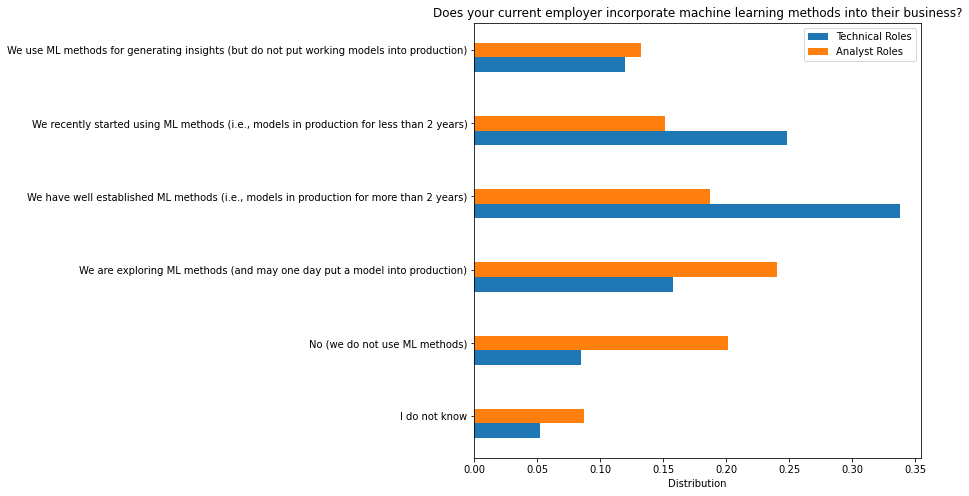

In [15]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

dftech = pd.concat([df_ds, df_se, df_rs, df_de, df_st, df_dba])
dfana = pd.concat([df_da, df_pm, df_ba])

MLmethods = dfb[dfb.columns[pd.Series(dfb.columns).str.startswith('Q8')]]
MLmethods = MLmethods.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLmethods_data = MLmethods.data.value_counts(normalize=True)

MLmethods_dftech = dftech[dftech.columns[pd.Series(dftech.columns).str.startswith('Q8')]]
MLmethods_dftech = MLmethods_dftech.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLmethods_dftechdata = MLmethods_dftech.data.value_counts(normalize=True)

MLmethods_dfana = dfana[dfana.columns[pd.Series(dfana.columns).str.startswith('Q8')]]
MLmethods_dfana = MLmethods_dfana.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLmethods_dfanadata = MLmethods_dfana.data.value_counts(normalize=True)

MLmethods_sort = sorted(dict(MLmethods_data), key=lambda x:x.lower())

MLmethods_sort

tech_MLmethods = []
ana_MLmethods = []

for key in MLmethods_sort:
    
    try:
        tech_MLmethods.append(dict(MLmethods_dftechdata)[key])
    except:
        tech_MLmethods.append(0)
    try:
        ana_MLmethods.append(dict(MLmethods_dfanadata)[key])
    except:
        ana_MLmethods.append(0)

MLmethods_pos = np.arange(len(MLmethods_sort))

ax.barh(MLmethods_pos-0.2, tech_MLmethods, height = 0.2, label = 'Technical Roles')
ax.barh(MLmethods_pos+0.0, ana_MLmethods, height = 0.2, label = 'Analyst Roles')

ax.legend()
ax.set_title('Does your current employer incorporate machine learning methods into their business?')
ax.set_xlabel('Distribution')
plt.yticks(MLmethods_pos, MLmethods_sort)

plt.show()

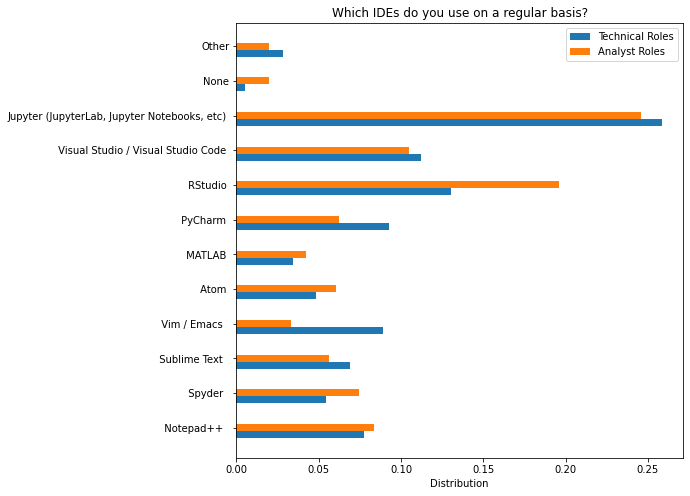

In [16]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

dftech = pd.concat([df_ds, df_se, df_rs, df_de, df_st, df_dba])
dfana = pd.concat([df_da, df_pm, df_ba])

primarytool = dfb[dfb.columns[pd.Series(dfb.columns).str.startswith('Q16')]]
primarytool = primarytool.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
primarytool_data = primarytool.data.value_counts(normalize=True)

primarytool_dftech = dftech[dftech.columns[pd.Series(dftech.columns).str.startswith('Q16')]]
primarytool_dftech = primarytool_dftech.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
primarytool_dftechdata = primarytool_dftech.data.value_counts(normalize=True)

primarytool_dfana = dfana[dfana.columns[pd.Series(dfana.columns).str.startswith('Q16')]]
primarytool_dfana = primarytool_dfana.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
primarytool_dfanadata = primarytool_dfana.data.value_counts(normalize=True)

primarytool_sort = sorted(dict(primarytool_data), key=lambda x:x.lower())

primarytool_sort

tech_primarytool = []
ana_primarytool = []

for key in primarytool_sort:
    
    try:
        tech_primarytool.append(dict(primarytool_dftechdata)[key])
    except:
        tech_primarytool.append(0)
    try:
        ana_primarytool.append(dict(primarytool_dfanadata)[key])
    except:
        ana_primarytool.append(0)

primarytool_pos = np.arange(len(primarytool_sort))

ax.barh(primarytool_pos-0.2, tech_primarytool, height = 0.2, label = 'Technical Roles')
ax.barh(primarytool_pos+0.0, ana_primarytool, height = 0.2, label = 'Analyst Roles')

ax.legend()
ax.set_title('Which IDEs do you use on a regular basis?')
ax.set_xlabel('Distribution')
plt.yticks(primarytool_pos, primarytool_sort)

plt.show()

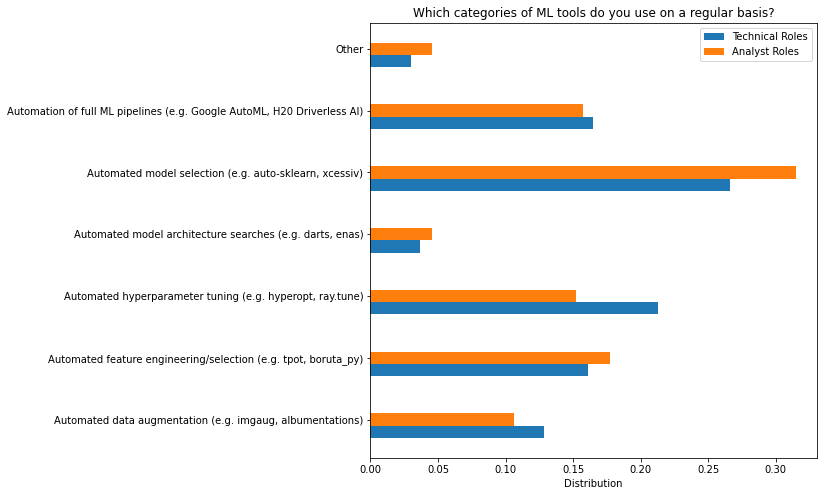

In [17]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

dftech = pd.concat([df_ds, df_se, df_rs, df_de, df_st, df_dba])
dfana = pd.concat([df_da, df_pm, df_ba])

MLtools = dfb[dfb.columns[pd.Series(dfb.columns).str.startswith('Q25')]]
MLtools = MLtools.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLtools_data = MLtools.data.value_counts(normalize=True)

MLtools_dftech = dftech[dftech.columns[pd.Series(dftech.columns).str.startswith('Q25')]]
MLtools_dftech = MLtools_dftech.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLtools_dftechdata = MLtools_dftech.data.value_counts(normalize=True)

MLtools_dfana = dfana[dfana.columns[pd.Series(dfana.columns).str.startswith('Q25')]]
MLtools_dfana = MLtools_dfana.stack().reset_index(level=1, drop=True).to_frame('data').reset_index().dropna()
MLtools_dfanadata = MLtools_dfana.data.value_counts(normalize=True)

MLtools_sort = sorted(dict(MLtools_data), key=lambda x:x.lower())

MLtools_sort

tech_MLtools = []
ana_MLtools = []

for key in MLtools_sort:
    
    try:
        tech_MLtools.append(dict(MLtools_dftechdata)[key])
    except:
        tech_MLtools.append(0)
    try:
        ana_MLtools.append(dict(MLtools_dfanadata)[key])
    except:
        ana_MLtools.append(0)

MLtools_pos = np.arange(len(MLtools_sort))

ax.barh(MLtools_pos-0.2, tech_MLtools, height = 0.2, label = 'Technical Roles')
ax.barh(MLtools_pos+0.0, ana_MLtools, height = 0.2, label = 'Analyst Roles')

ax.legend()
ax.set_title('Which categories of ML tools do you use on a regular basis?')
ax.set_xlabel('Distribution')
plt.yticks(MLtools_pos, MLtools_sort)

plt.show()

Important information from the above figures:



*   Q: Does your current employer incorporate machine learning methoda to their business? It is evident that for technical roles, ML methods are either well established, or are up and coming, in the companies where these data professionals work at, while it is less common for analyst roles.
*   Q: Which IDEs do you use on a regular basis? Jupyter is the most commonly used IDE for data professionals, whether in technical or analyst roles. Visual Studio, PyCharm and Vim are more common for those in technical roles, while RStudio is more common for those in analyst or management roles.
*   Q: Which categories of ML tools do you use on a regular basis? It is evident from the answers that ML tools are more commonly used for those in technical roles than those in analyst roles, again supporting the data in the first bullet point.

The information above illustrates the nature and environment of different roles which can be taken into consideration when designing a course or a curriculum for students building their career as a data professional. From the data shown here, it can be inferred that students may benefit in having different streams as options for specialization.


### Course Curriculum Data

An exploration is done into the course database from various universities to see what kinds of courses are being offered and where they are being offered

In [18]:
# Imports

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
stop = pd.read_table('stop_words.txt', names = ['stopwords'])
stop_nltk = stopwords.words('english')
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
course_df = pd.read_csv('courses.csv')
course_df.head()

,Unnamed: 0,University,Program name,Course,Course description,Intended Job,Program link:
0,0,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
1,1,MIT,Master of Business Analytics,The Analytics Edge,examines data analytics transform businesses i...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
2,2,MIT,Master of Business Analytics,Statistical Learning and Data Mining,introduction theory statistics data mining mac...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
3,3,MIT,Master of Business Analytics,Prediction: Machine Learning and Statistics,practical theoretical foundation machine learn...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
4,4,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...


In [0]:
# make word clouds to show the most recurrent words in the course descriptions
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stop = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

First, we will look at a word cloud of the most common terms in the university course descriptions.

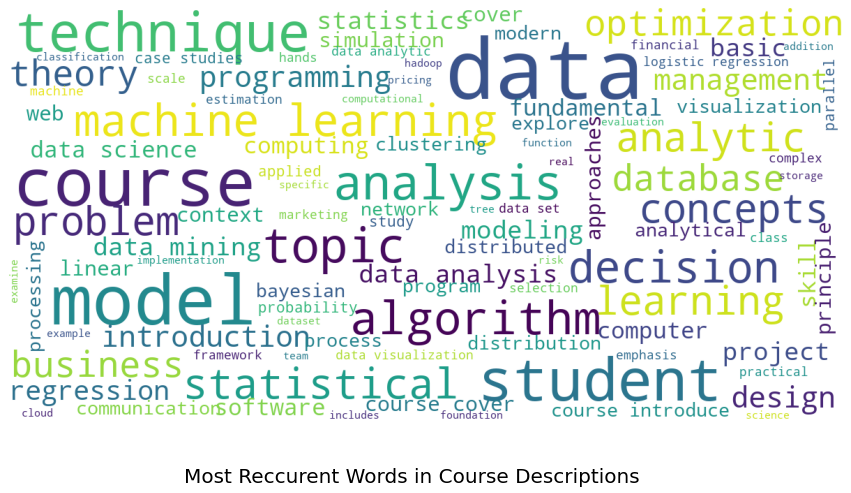

In [21]:
show_wordcloud(course_df['Course description'].tolist(),'Most Reccurent Words in Course Descriptions')

We see various terms we expect to be common, data, machine learning, model, statistical and many others.

Next, we can examine what schools are offering these programs, and how many courses they are offering.

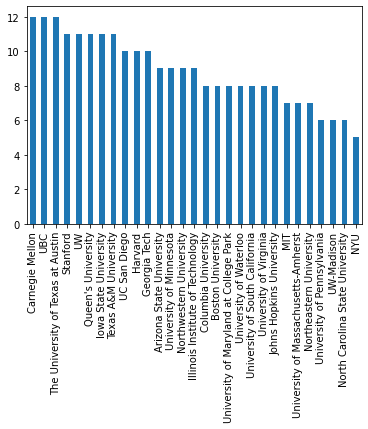

In [22]:
course_df['University'].value_counts().plot(kind='bar')

This database also shows an intended job for each program, we can see a near equal split betweeb data scientist and data analyst


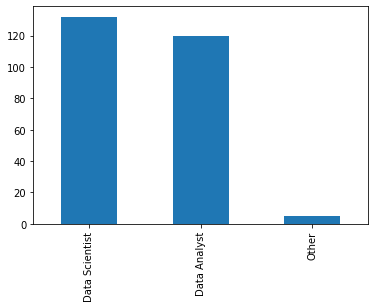

In [23]:
course_df['Intended Job'].value_counts().plot(kind='bar')

The expanded course database including datacamp courses was also examined to find trends in the industry.

In [0]:
courses=pd.read_pickle('coursePickle.pickle')

In [25]:
courses.head()

,Course,Intended Job,Program link:,Program name,University,description,technology,url
0,Introduction to R,NaN,NaN,NaN,NaN,Master the basics of data analysis by manipula...,r,https://www.datacamp.com//courses/free-introdu...
1,Intermediate R,NaN,NaN,NaN,NaN,Continue your journey to becoming an R ninja b...,r,https://www.datacamp.com//courses/intermediate-r
2,Introduction to Machine Learning,NaN,NaN,NaN,NaN,Learn to train and assess models performing co...,r,https://www.datacamp.com//courses/introduction...
3,Cleaning Data in R,NaN,NaN,NaN,NaN,Learn to explore your data so you can properly...,r,https://www.datacamp.com//courses/cleaning-dat...
4,Introduction to Python,NaN,NaN,NaN,NaN,Master the basics of data analysis in Python. ...,python,https://www.datacamp.com//courses/intro-to-pyt...


In [26]:
nltk.download('punkt')

courses['Course'] = courses['Course'].str.replace('[^a-zA-Z]', ' ')
courses['clean'] = courses['Course'].apply(nltk.tokenize.word_tokenize)

#courses['clean'] = courses['clean'].apply(lambda x: [item for item in x if item not in stop])
courses['clean'] = courses['clean'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The technologies in each DataCamp course is shown below, the majority of courses are in r and python, followed by sql.

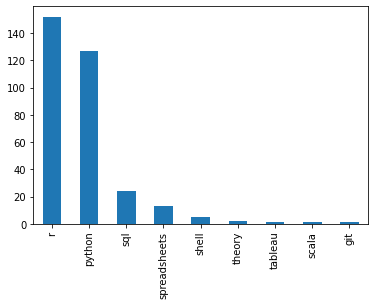

In [27]:
courses['technology'].value_counts().plot(kind='bar')

Examining the most common terms in the courses titles we see similar trends, R, Python, Data, machine learning are all prominent.

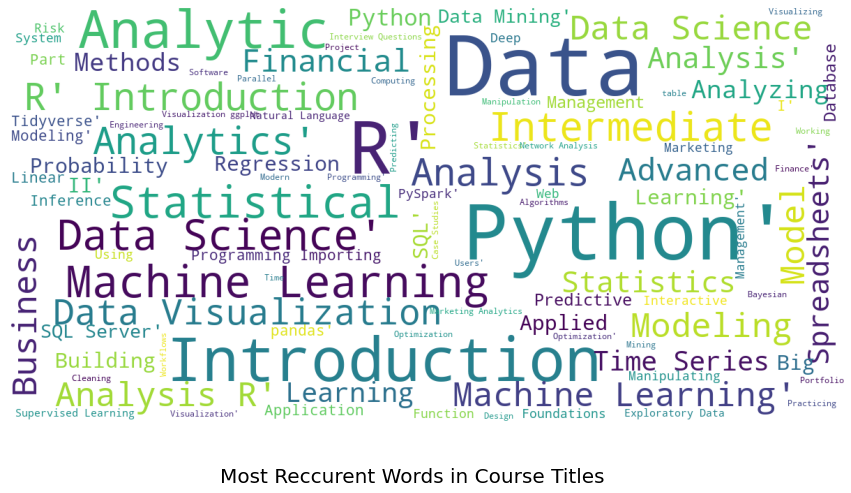

In [28]:
show_wordcloud(courses['Course'].tolist(),'Most Reccurent Words in Course Titles')

## Part 1 - Introductory Data Science and Analytics Course

Detailed within is the systematic design of an introductory data science and analytics course. 

**Method.** The data first undergoes an initial cleaning; words with 3 or more repeating letters, stopwords, newline characters, URLs, special characters, words longer than 10 characters and shorter than 3 are removed. The remaining text data is subsequently split and stemmed.The cleaned Job description text is then featurized and clustered using cosine similarity and Wards method. This hierarchical clustering identifies the most frequent words within the text and their proximity to other frequent words in the job description dataset; these clustered words represents the themes which are most saught after by employers. Once the themes are identified, a second analysis is conducted on the the course description data to find which topics are most closely related to the identified themes. The topics identified in the course descriptions will be the topics covered in the introductory course.  

#### Data Cleaning 
The course and job descriptions are cleaned. 

In [0]:
# ------------------------- clean description data ------------------------------- #
stop = stopwords.words('english')
stemmer = SnowballStemmer('english')

jobs['cleaned_desc'] = jobs['job_description'].str.replace('read what people are saying about working here.', '')
jobs['cleaned_desc'] = jobs['cleaned_desc'].replace(to_replace=r'\b\w*?(\w)\1{2}\w*', value=' ', regex=True)
jobs['cleaned_desc'] = jobs['cleaned_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
jobs['cleaned_desc'] = jobs['cleaned_desc'].str.replace(r'\n', ' ')
jobs['cleaned_desc'] = jobs['cleaned_desc'].str.replace(r'http\S+|www.\S+', ' ')
jobs['cleaned_desc'] = jobs['cleaned_desc'].str.replace('[^a-zA-Z]', ' ')
jobs['cleaned_desc'] = jobs['cleaned_desc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
jobs['cleaned_desc'] = jobs['cleaned_desc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<10]))
jobs['split_desc'] = jobs['cleaned_desc'].str.split()
jobs['stemmed_desc'] = jobs['split_desc'].apply(lambda x: [stemmer.stem(w) for w in x])
jobs['stemmed_desc'] = jobs['stemmed_desc'].str.join(' ')

courses['cleaned_desc'] = courses['description'].replace(to_replace=r'\b\w*?(\w)\1{2}\w*', value=' ', regex=True)
courses['cleaned_desc'] = courses['cleaned_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
courses['cleaned_desc'] = courses['cleaned_desc'].str.replace(r'\n', ' ')
courses['cleaned_desc'] = courses['cleaned_desc'].str.replace(r'http\S+|www.\S+', ' ')
courses['cleaned_desc'] = courses['cleaned_desc'].str.replace('[^a-zA-Z]', ' ')
courses['cleaned_desc'] = courses['cleaned_desc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
courses['cleaned_desc'] = courses['cleaned_desc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<10]))
courses['split_desc'] = courses['cleaned_desc'].str.split()
courses['stemmed_desc'] = courses['split_desc'].apply(lambda x: [stemmer.stem(w) for w in x])
courses['stemmed_desc'] = courses['stemmed_desc'].str.join(' ')

#### Hierarchical Clustering 
The data science job descriptions are turned into features using TFIDF, and clustered using cosine similarity and Wards method. 

Text(0.5, 1.0, 'Word associations in the job description data set')

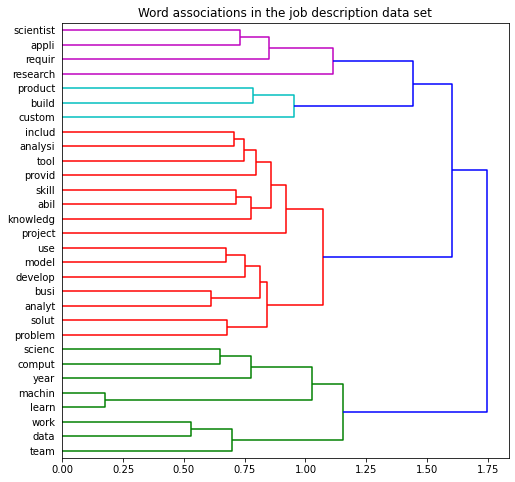

In [30]:
#------------------------------ clustering ------------------------------
Tfidf = TfidfVectorizer(max_features=30)

features = pd.DataFrame(Tfidf.fit_transform(jobs['stemmed_desc']).toarray(), columns=Tfidf.get_feature_names()).T 
dist = 1-cosine_similarity(features)

linkage = ward(dist)

fig, ax = plt.subplots(figsize=(8, 8)) 
ax = dendrogram(linkage, labels=Tfidf.get_feature_names(), orientation='right') 
plt.title('Word associations in the job description data set')

The words in the above dendrogram represent the most common and most closely associated words in the job description data set. Five distinct clusters can be seen in this dendrogram, the puprle cluster, the blue cluster, the upper and lower branches of the red cluster, and the green cluster. 

The purple cluster has a primary theme of scientific communication skills. Since the course being designed is expected to be targeted towards people in the field of science and engineering the participants of this course are expected to have a well developed base of scientific communication skills. This course will build off of those skills by requiring several technical reports be produced as one of the main forms of deliverables. This will directly address the need identified in the job description data for prospective employees to have scientific communication skills.

The blue cluster emphasizes a product development theme. This cluster will be addressed by including a large final project in the course curriculum. The project will focus on design a product that is able to be brought to market. The product should showcase skills taught in the course as well as soft skills like business communication. 

The upper red cluster emphasizes model development while the lower red cluster emphasizes business analytics. These themes should be covered in detail and should have specific course applications. To determine which topics are covered to address these themes cosine similarity and Wards method are used, this is presented in the next section.  

The final cluster has a machine learning and scientific computing theme. Similar to the above the topics covered to address this theme are selected using cosine similarity and Wards method and are discussed next. 

#### Topic Selection 
Identified above are the themes which employers most desire. They include 
1. Scientific communication
2. Product development 
3. Model development 
4. Business analytics
5. Machine Learning

As discussed themes 1 and 2 can be adressed through report writing and a final project. In order to address themes 3 to 5 specific concepts must be taught. These concepts will be identified through analyzing established course descriptions in the courses dataset. An identifying word is selected for each of the theme clusters and the distance between that identifier and other words in the course description is computed using cosine similarity and Wards method. 

The Modelling cluster identifier is 'model', machine learning identifier is 'learn', and business analytics is 'busi'. 

In [0]:
Tfidf = TfidfVectorizer(max_features=800)

features = pd.DataFrame(Tfidf.fit_transform(courses['stemmed_desc']).toarray(), columns=Tfidf.get_feature_names()).T
dist = 1-cosine_similarity(features)
featureWords = Tfidf.get_feature_names()
modIndex = np.arange(len(dist[featureWords.index('model')]))
mlIndex = np.arange(len(dist[featureWords.index('learn')]))
baIndex = np.arange(len(dist[featureWords.index('busi')]))


def cluster_words(index, features, target):
    target_words = sorted(zip(dist[features.index(target)], index))
    out_words = []
    for word in target_words[0:30]:
        out_words.append(features[word[1]])

    return out_words


ModclustWords = cluster_words(modIndex, featureWords, 'model')
MLclustWords = cluster_words(mlIndex, featureWords, 'learn')
BAclustWords = cluster_words(baIndex, featureWords, 'busi')

The lists above contain the words most closely related to the identifiers. These lists are cleaned to remove certain unhelpful words and the clusters are visualized. The code for visualizations are commented out as the graphviz package requires to be added to path. Alternatively the graphic is loaded directly to the notebook. 

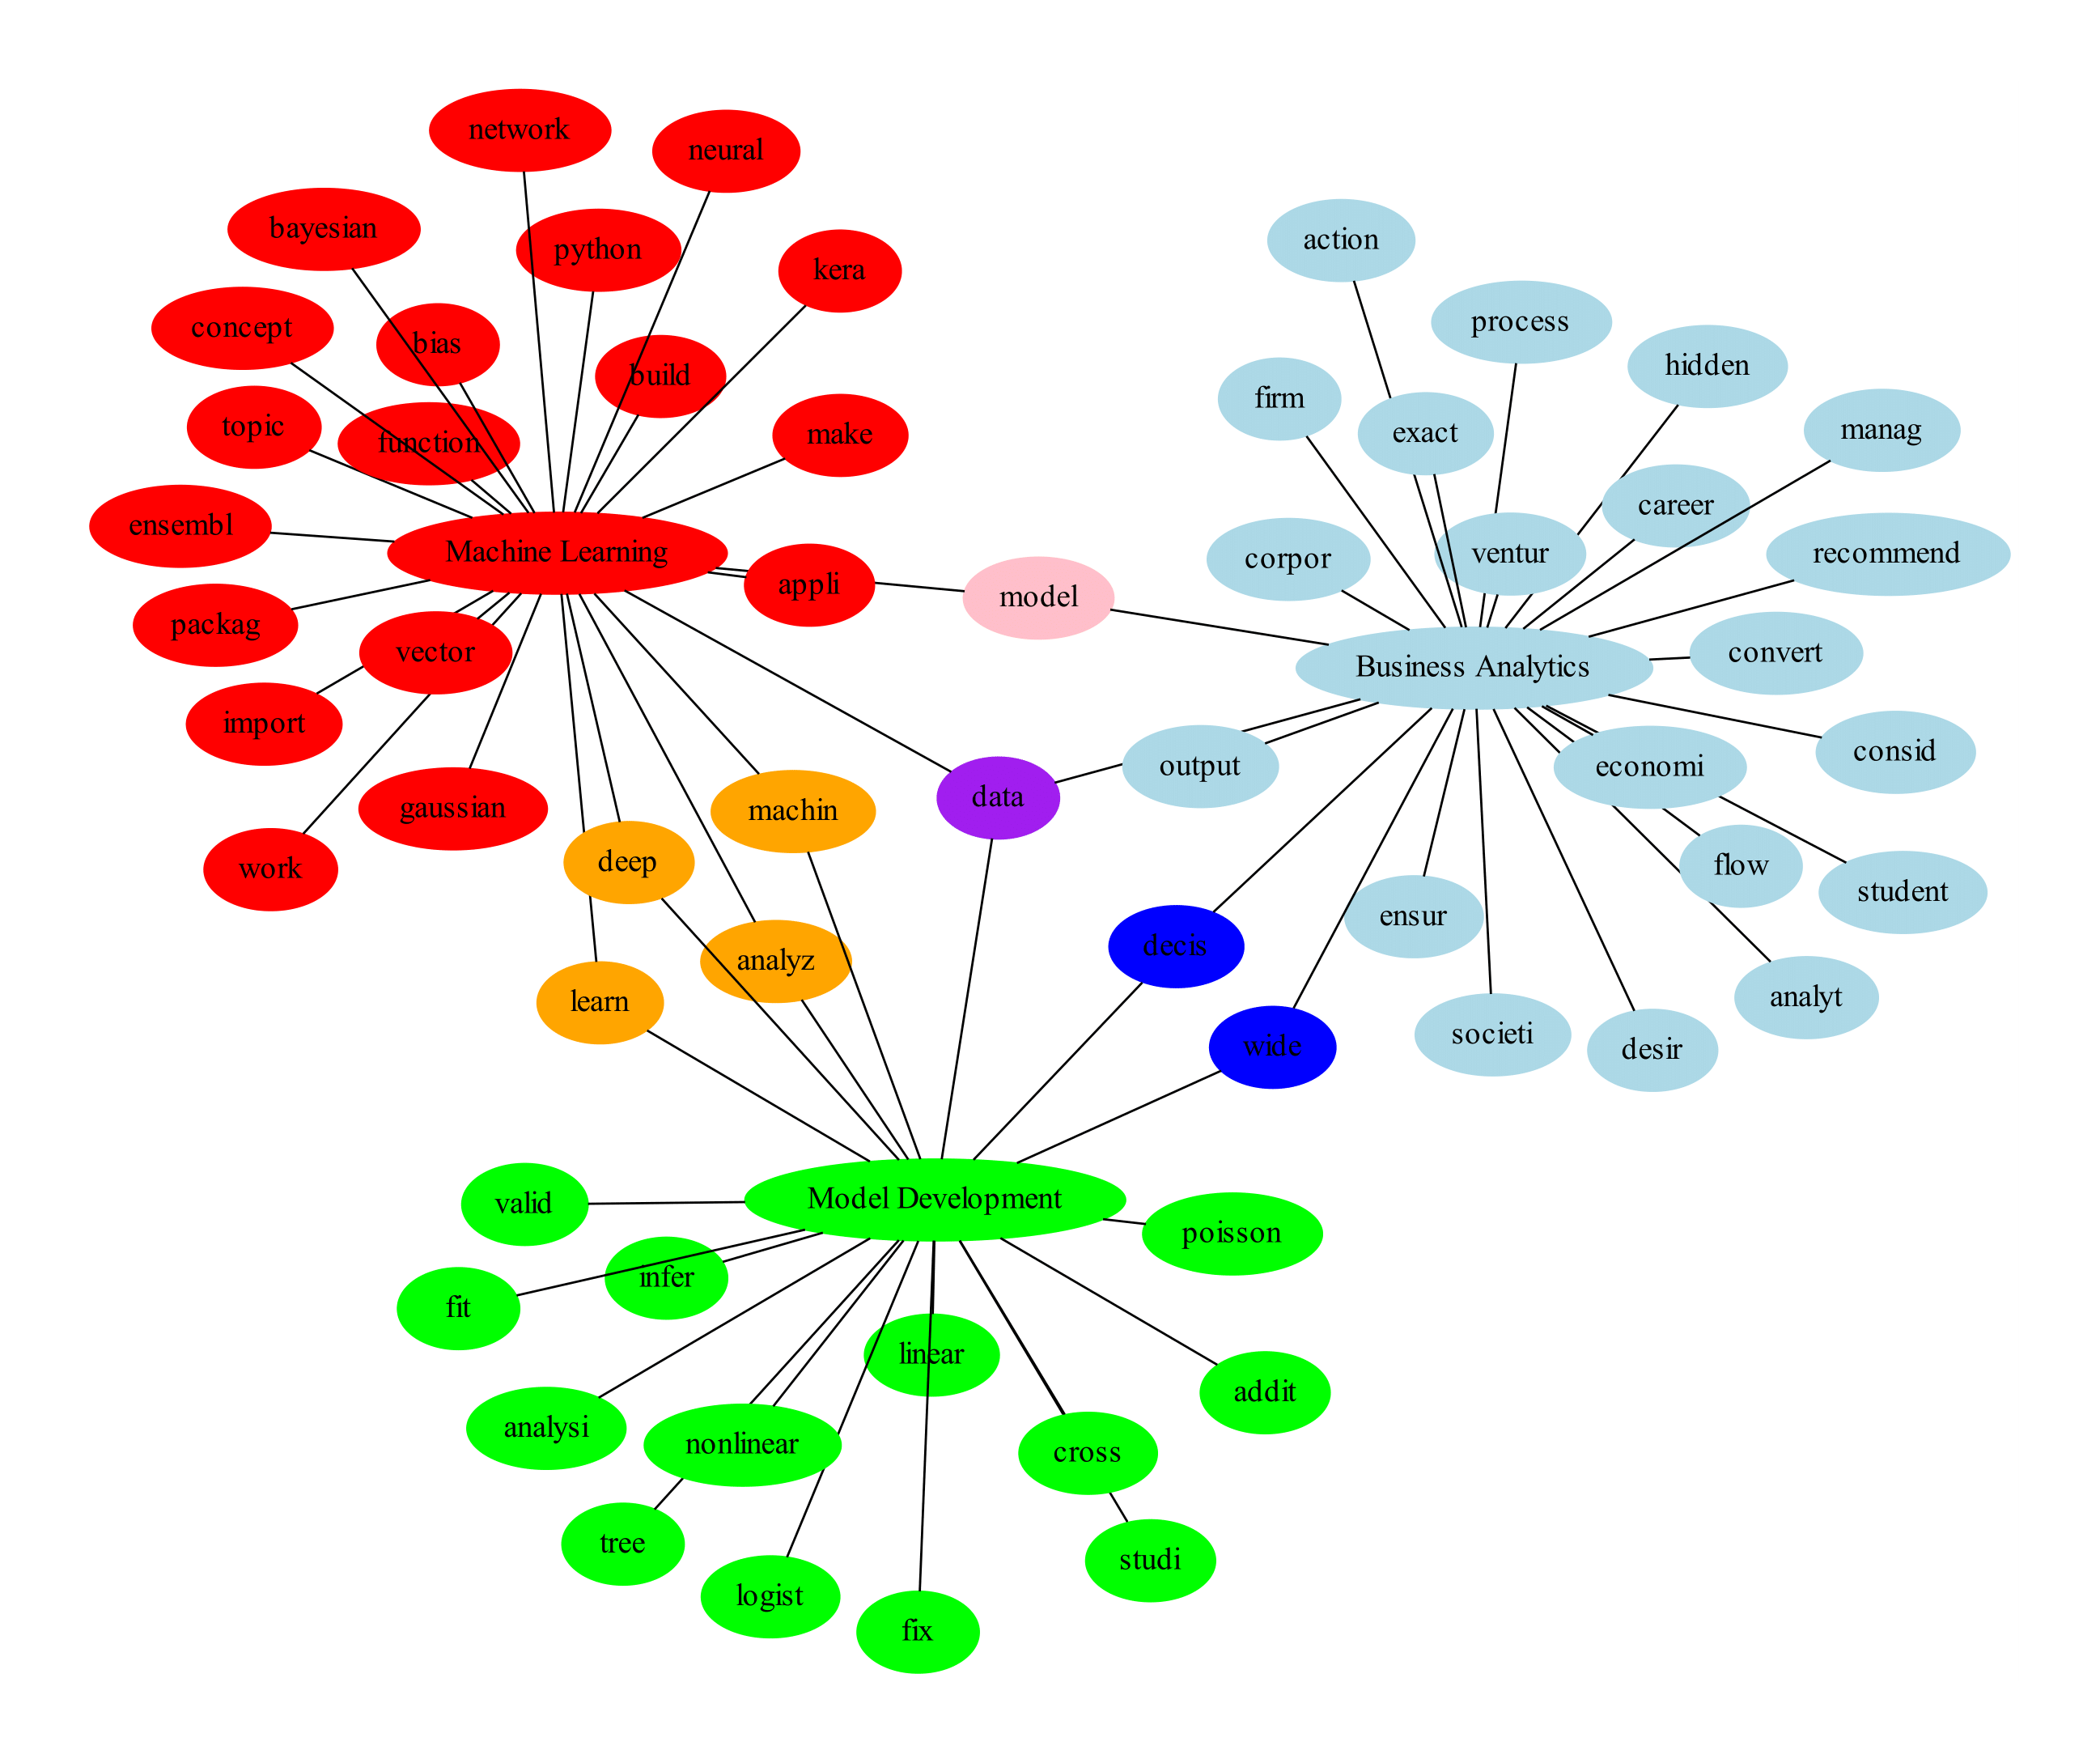

In [32]:
def drop_words(drop_list, target):
    for w in drop_list:
        target.remove(w)
    return target


BAclustWords = drop_words(['busi', 'hand', 'claim', 'form', 'exercis', 'pervad'], BAclustWords)
MLclustWords = drop_words(['cours', 'basic', 'onlin', 'time', 'use', 'creat'], MLclustWords)
ModclustWords = drop_words(['model', 'cours', 'select', 'topic', 'cover', 'effect', 'concept', 'ground', 'basi',
                            'arma'], ModclustWords)


def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3


BAMLintersect = intersection(BAclustWords, MLclustWords)
BAModintersect = intersection(BAclustWords, ModclustWords)
MLModintersect = intersection(MLclustWords, ModclustWords)

# ----------------------------------------- visualize ----------------------------------------- #
# filename = 'CourseCluster.gv'
# g = Graph('G', filename=filename, engine='sfdp', comment='Redesigned MIE1624 Course Curriculum')

# for word in BAclustWords:
#     g.attr('node', style='filled', color='pink')
#     g.node('model')
#     if word in BAMLintersect:
#         g.attr('node', style='filled', color='purple')
#         g.edge('Business Analytics', word)
#     elif word in BAModintersect:
#         g.attr('node', style='filled', color='blue')
#         g.edge('Business Analytics', word)
#     else:
#         g.attr('node', style='filled', color='lightblue')
#         g.edge('Business Analytics', word)

# for word in MLclustWords:
#     g.attr('node', style='filled', color='red')
#     g.node('Machine Learning')

#     if word in MLModintersect:
#         g.attr('node', style='filled', color='orange')
#         g.edge('Machine Learning', word)
#     else:
#         g.attr('node', style='filled', color='red')
#         g.edge('Machine Learning', word)

# for word in ModclustWords:
#     g.attr('node', style='filled', color='green')
#     g.edge('Model Development', word)

# g.attr(overlap='false')
# g.view()
courseCluster = Image.open('CourseCluster.gv-1.png')
courseCluster

The above graph illustrates the association between the main themes (larger central nodes) and the topics to be taught (smaller branched nodes) in the new Introduction to Data Science and Analytics course. Shared nodes are coloured differntly to show connections between the themes. Due to Time constraints for course offerings not all of the above topics will be specifically addressed. 

In summary, the Introduction to Data Science course was designed using data highlighting skills which are most needed by employers. The topics covered were selected using established course data to determine which skills/subjects would be best to address the needs of the employers. 

The course will be taught exclusively in python as this was the most in demand programming language. The course deliverables will include written reports which emphasize scientific communication skills. The final deliverable will be a design project focused on creating a product that would be useful in the field of data science, this project is intended to address the product development theme identified as important to employers. 

The topics covered in the course are designed to adress the identified themes of Machine learning, Model Development, and Business analytics and are listed below.

* Model Development
  * linear and nonlinear models
  * logistic regression
  * decision trees
  * testing and validation
* Machine Learning 
  * statistics concepts; bayesian statistics, poission/gaussian distributions distributions
  * deep learning
  * neural networks
  * keras
  * ensemble tree methods
  * bias variance tradeoff
* Business Analytics 
  * career building
  * recommendation
  * economics
  * analysis 
  * corporation

The business analytics cluster includes mainly soft skills and would benefit from being integrated as a larger theme throughout the entire course rather than being directly taught. For this reason the deliverables should also have a focus on business analytics; providing consulting reports, drawing conclusions, and making recommendations based on collected data. So, finally, the main themes to be taught in the course are Machine Learning and Model Development the topics which will be covered are listed above and found in the above graph figure. 


## Part 2 - Master of Data Science Program Design

This section details the process of the design of a Master of Data Science Program.

**Method**: A database of courses was compiled from various sources including university and online. K-means clustering was used to determine the grouping of course topics and streams based on course titles and descriptions. 

In [33]:
# Imports

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
stop = pd.read_table('stop_words.txt', names = ['stopwords'])
stop_nltk = stopwords.words('english')
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First, a database of courses and course descriptions was imported. From this database, the course titles and descriptions will be analyzed for recurring themes such that a curriculum can be designed with specifc branches with core skills in data science and analytics. 

In [0]:
#read courses database
course_df = pd.read_csv('courses.csv')

In [35]:
course_df.head()

,Unnamed: 0,University,Program name,Course,Course description,Intended Job,Program link:
0,0,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
1,1,MIT,Master of Business Analytics,The Analytics Edge,examines data analytics transform businesses i...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
2,2,MIT,Master of Business Analytics,Statistical Learning and Data Mining,introduction theory statistics data mining mac...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
3,3,MIT,Master of Business Analytics,Prediction: Machine Learning and Statistics,practical theoretical foundation machine learn...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
4,4,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...


In [0]:
#instantiate vectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer(ngram_range=(1,3)) # use 1-3 grams
X=course_df['Course description']
X=tfidf.fit_transform(X)

#### Course Description Exploration


In [37]:
# function to display the top 10 TFIDF scores for the words in course descriptions
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_scores= sorted_scores[0:10]
    for item in top_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1])) 
      

display_scores(tfidf,X)

data                                               Score: 11.460227358737656
course                                             Score: 6.2872233441213305
learning                                           Score: 5.87631252749227
models                                             Score: 4.77049126269699
analysis                                           Score: 4.740340536557175
students                                           Score: 4.465217198338013
techniques                                         Score: 4.149299963811498
regression                                         Score: 3.9697520731576414
statistical                                        Score: 3.851828729030034
analytics                                          Score: 3.8456817407158845


#### Course Description Clustering


To determine the main course clusters for students, k-means clustering  was used on the tokenized descriptions. With clusters determined, introductory courses, pre-requistes and course paths can be determined.



In [0]:
#calculate within-cluster-sum-of-squares for a variety of cluster numbers
wcss =[]
for i in range(1,8):
  kmeans=KMeans(n_clusters = i, init ='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) 

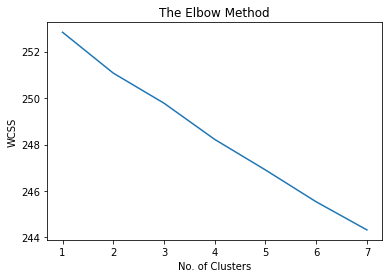

In [39]:
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
#cluster course descriptions
true_k=7

km= KMeans(n_clusters=3, init='k-means++',n_init=1000, random_state=42)
km.fit(X)

y_kmeans=km.predict(X)


In [41]:
# print the top terms per cluster
print("Top term per cluster:")
order_centroids= km.cluster_centers_.argsort()[:,::-1]
terms = tfidf.get_feature_names()

for i in range(3):
  print("Cluster %d" %i),
  for ind in order_centroids[i,:10]:
    print(' %s' %terms[ind]),
  print
print("\n")

Top term per cluster:
Cluster 0
 learning
 regression
 linear
 models
 course
 machine
 machine learning
 theory
 algorithms
 topics
Cluster 1
 data
 course
 analysis
 analytics
 techniques
 business
 students
 models
 decision
 science
Cluster 2
 project
 capstone
 students
 capstone project
 teams
 course
 program
 data
 designed
 groups




From the clustering, we can see three clusters with core themes; in cluster 0 machine learning, algorithms and statistics, in cluster 1 data analytics, business and decision making and in cluster 2 project based work with teams and a capstone project. These clusters help determine how to build the program.

#### Course Title Exploration


The same technique was applied to the titles of a larger database of courses from DataCamp.

In [0]:
courses=pd.read_pickle('coursePickle.pickle')

In [0]:
courses['Course'] = courses['Course'].str.replace('[^a-zA-Z]', ' ')
courses['clean'] = courses['Course'].apply(nltk.tokenize.word_tokenize)

courses['clean'] = courses['clean'].apply(lambda x: [item for item in x if item not in stop_nltk])
courses['clean'] = courses['clean'].apply(lambda x: [item for item in x if item not in stop])

In [0]:
X=courses['clean'].astype(str)
X=tfidf.fit_transform(X)

In [45]:
display_scores(tfidf,X)

data                                               Score: 27.724913898249895
introduction                                       Score: 18.271505685247956
learning                                           Score: 17.90718421253512
python                                             Score: 17.148590357515324
analytics                                          Score: 14.749268667074132
machine                                            Score: 13.116428840196686
analysis                                           Score: 13.018410362527318
machine learning                                   Score: 12.944394380729165
science                                            Score: 10.151723964062429
data science                                       Score: 9.901273801178665


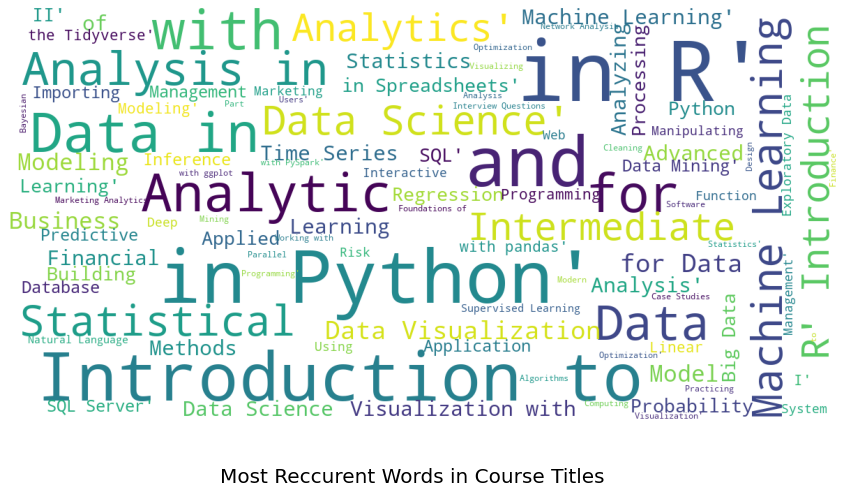

In [46]:
show_wordcloud(courses['Course'].tolist(),'Most Reccurent Words in Course Titles')

#### Course Title Clustering

In [0]:
wcss =[]

for i in range(1,8):
  kmeans=KMeans(n_clusters = i, init ='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) 

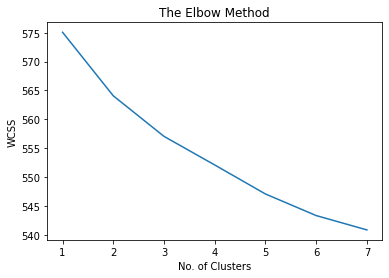

In [48]:
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
km= KMeans(n_clusters=3, init='k-means++',n_init=1000, random_state=1)
km.fit(X)

y_kmeans=km.predict(X)

In [50]:
print("Top term per cluster:")
order_centroids= km.cluster_centers_.argsort()[:,::-1]
terms = tfidf.get_feature_names()

for i in range(3):
  print("Cluster %d" %i),
  for ind in order_centroids[i,:10]:
    print(' %s' %terms[ind]),
  print
print("\n")

Top term per cluster:
Cluster 0
 data
 introduction
 python
 analytics
 analysis
 modeling
 intermediate
 statistical
 mining
 data mining
Cluster 1
 learning
 machine learning
 machine
 statistical learning
 statistical
 unsupervised learning
 unsupervised
 deep
 deep learning
 python
Cluster 2
 data
 data science
 science
 data visualization
 visualization
 introduction data
 introduction
 introduction data science
 data visualization ggplot
 ggplot




#### Course Path Visualization

Next, using the datasets we compiled using machine learning algorithms we imported the data into Power BI and ran queries to produce the following data vizualizations for each of our masters streams: 

In [0]:
# load files from drive, unnecessarily complicated
file_id_4 = '1IQz2zQqjwODrjBfOsMFF_DvXYL0HdcNs'
downloaded = drive.CreateFile({'id': file_id_4})
downloaded = drive.CreateFile({'id':'1IQz2zQqjwODrjBfOsMFF_DvXYL0HdcNs'}) # replace the id with id of file you want to access
downloaded.GetContentFile('skill_distribution_data_scientist.PNG')

file_id_5 = '1SSvx5XcdPoWGgCXKHr3PfX6llXMq9p5L'
downloaded2 = drive.CreateFile({'id': file_id_5})
downloaded2 = drive.CreateFile({'id':'1SSvx5XcdPoWGgCXKHr3PfX6llXMq9p5L'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('skill_distribution_data_analyst.PNG')

file_id_6 = '1CHVlBmGSH0yZRzJm-qkA3NiRY8Ds22Ch'
downloaded3 = drive.CreateFile({'id': file_id_6})
downloaded3 = drive.CreateFile({'id':'1CHVlBmGSH0yZRzJm-qkA3NiRY8Ds22Ch'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('data_science.PNG')

file_id_7 = '16S2qvVxfUujTQzPVb1EUGKvWE7p_poSY'
downloaded3 = drive.CreateFile({'id': file_id_7})
downloaded3 = drive.CreateFile({'id':'16S2qvVxfUujTQzPVb1EUGKvWE7p_poSY'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('data_analyst.PNG')

**Skill Distribution for Data Scientist:**

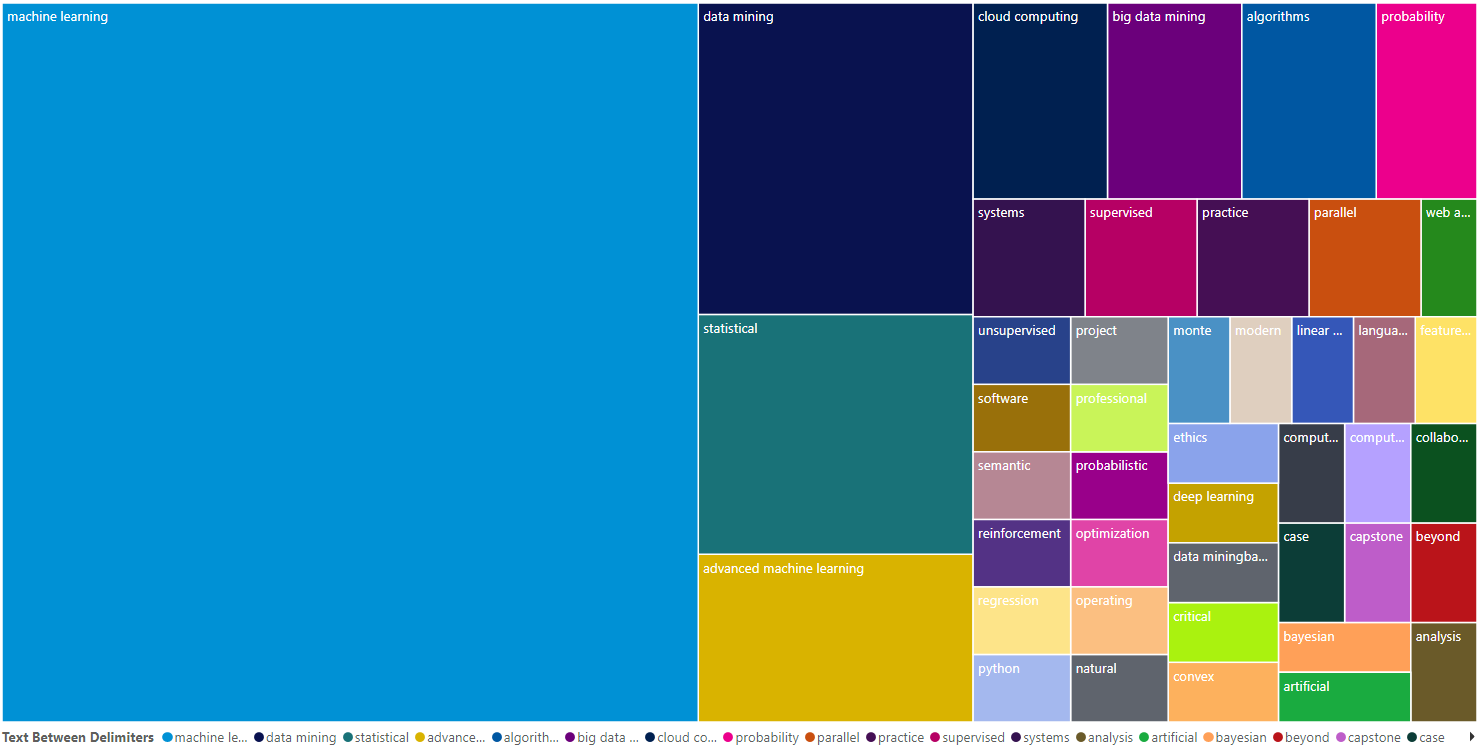

In [52]:
skill_distribution_data_scientist = Image.open('skill_distribution_data_scientist.PNG')
skill_distribution_data_scientist

**Skill Distribution for a Data Analyst:**

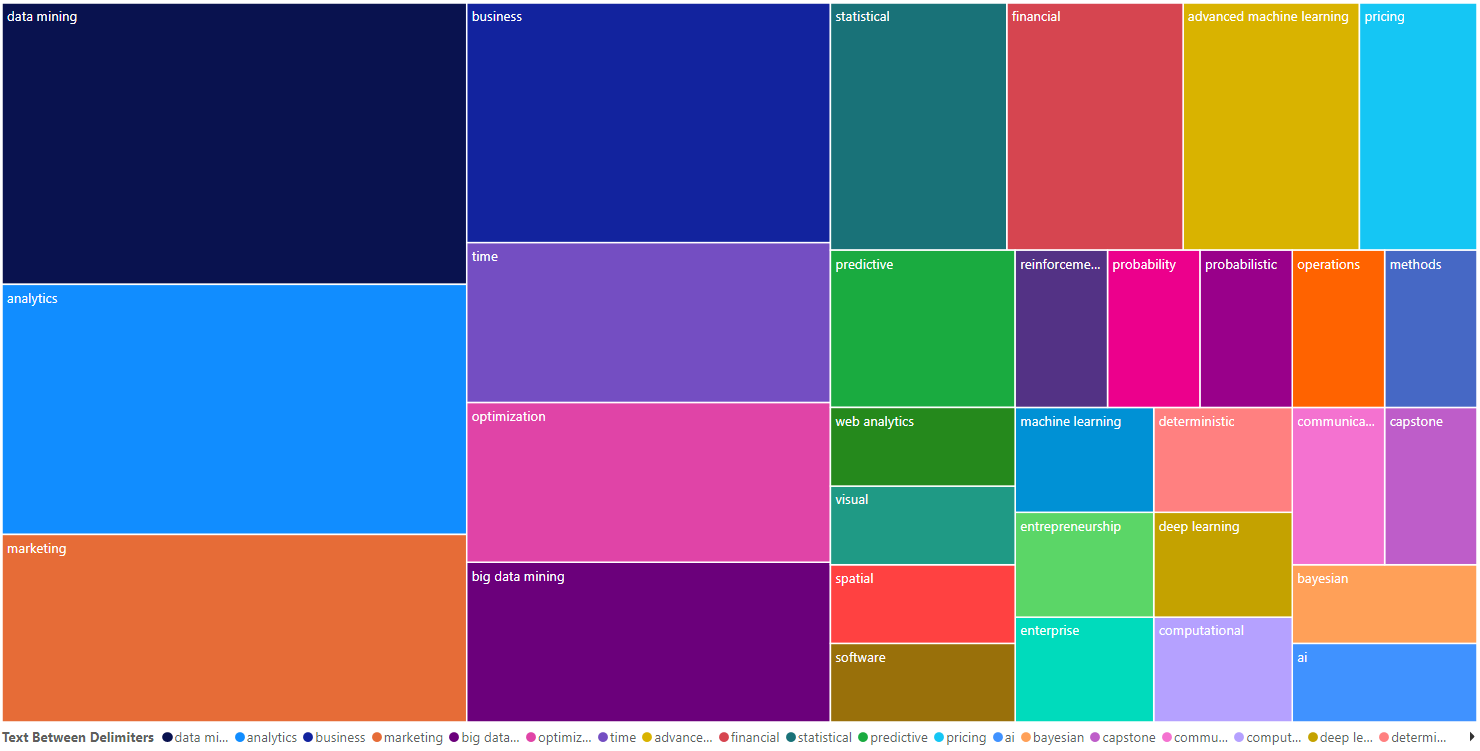

In [53]:
skill_distribution_data_analyst = Image.open('skill_distribution_data_analyst.PNG')
skill_distribution_data_analyst

Next, UofT Course Calendars of MIE, ECE and CSC graduate schools, as well as Rotman's Course Calendar information was used to provide a list of courses that will good candidates for each specialization. The webscraping code is commented out in the section below but the code walks through the process used to web scrape these course calendars. This step was necessary so that readily available courses at the University of Toronto can be incorporated into the design of the new Master program. It should be noted that the lists were generated using key words from the skill distribution figures above for the two streams.

In [0]:
#urlmie='https://www.mie.utoronto.ca/programs/graduate/courses/' #Create a handle, page, to handle the contents of the website
#
#pagemie = requests.get(urlmie)
#
#docmie = lh.fromstring(pagemie.content) #Store the contents of the website under doc
#
#tr_elements_mie = docmie.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML
#
#col=[]
#i=0
#
#for t in tr_elements_mie[0]: #For each row, store each first element (header) and an empty list
#    i+=1
#    name=t.text_content()
#    #print ('{0}:"{1}"'.format(i,name))
#    col.append((name,[]))
#
#for j in range(1,len(tr_elements_mie)):
#    T=tr_elements_mie[j] #T is our j'th row
#    
#    #If row is not of size 10, the //tr data is not from our table 
#    if len(T)!=5:
#        break
#    
#    i=0 #i is the index of our column
#    
#    for t in T.iterchildren(): #Iterate through each element of the row
#        data=t.text_content() 
#        if i>0: #Check if row is empty
#        #Convert any numerical value to integers
#            try:
#                data=int(data)
#            except:
#                pass
#        col[i][1].append(data) #Append the data to the empty list of the i'th column
#        i+=1 #Increment i for the next column
#
#create DataFrame
#MIE={title:column for (title,column) in col}
#df_UofTMIEcourses=pd.DataFrame(MIE)
#df_UofTMIEcourses['Course'] = df_UofTMIEcourses['Course'].map(lambda x: str(x).split('\n'))
#
#df1_UofTMIEcourses = df_UofTMIEcourses.drop(['Course details', 'Session offered', 'Instructor', 'Course areas'], axis=1)
#
#description = dict()
#for i in range(len(df1_UofTMIEcourses['Course'])):
#    for j in range(len(df1_UofTMIEcourses['Course'][i])-1):
#        df1_UofTMIEcourses['Course'][i][j] = df1_UofTMIEcourses['Course'][i][j].strip()
#    while("" in df1_UofTMIEcourses['Course'][i]):
#        df1_UofTMIEcourses['Course'][i].remove("") 
#
#    df1_UofTMIEcourses['Course'][i] = df1_UofTMIEcourses['Course'][i][0]
#
#df1_UofTMIEcourses['Courses'] = df1_UofTMIEcourses[['Course']].apply(lambda x: ''.join(x), axis=1)
#df1_UofTMIEcourses = df1_UofTMIEcourses.drop(['Course'], axis=1)
#
#df1_UofTMIEcourses.to_csv('MIEcourses.csv')
#
#urlece='https://www.ece.utoronto.ca/computer/grad-courses/timetable/' #Create a handle, page, to handle the contents of the website
#
#pageece = requests.get(urlece)
#
#docece = lh.fromstring(pageece.content) #Store the contents of the website under doc
#
#tr_elements_ece = docece.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML
#
#[len(T) for T in tr_elements_ece[:10]]
#
#i = 0
#while i < len(tr_elements_ece)-1:
#    if len(tr_elements_ece[i]) != 7:
#        tr_elements_ece.pop(i)
#    else:
#        i = i+1
#        
#[len(T) for T in tr_elements_ece[:10]]
#
#col_ece=[]
#i=0
#
#for t in tr_elements_ece[0]: #For each row, store each first element (header) and an empty list
#    i+=1
#    name=t.text_content()
#    #print ('{0}:"{1}"'.format(i,name))
#    col_ece.append((name,[]))
#
#for j in range(1,len(tr_elements_ece)):
#    T=tr_elements_ece[j] #T is our j'th row
#    
#    #If row is not of size 10, the //tr data is not from our table 
#    if len(T)!=7:
#        break
#    
#    i=0 #i is the index of our column
#    
#    for t in T.iterchildren(): #Iterate through each element of the row
#        data=t.text_content() 
#        if i>0: #Check if row is empty
#        #Convert any numerical value to integers
#            try:
#                data=int(data)
#            except:
#                pass
#        col_ece[i][1].append(data) #Append the data to the empty list of the i'th column
#        i+=1 #Increment i for the next column
#
#create DataFrame
#ECE={title:column for (title,column) in col_ece}
#df_UofTECEcourses=pd.DataFrame(ECE)
#
#df_UofTECEcourses['Course Code'] = df_UofTECEcourses['Course Code'].map(lambda x: str(x).split('\n'))
#df1_UofTECEcourses = df_UofTECEcourses.drop(['Session Code', 'Instructor', 'Day(s)+Time', 'Room(s)','Start Date'], axis=1)
#
#description = dict()
#for i in range(len(df1_UofTECEcourses['Course Code'])):
#    for j in range(len(df1_UofTECEcourses['Course Code'][i])-1):
#        df1_UofTECEcourses['Course Code'][i][j] = df1_UofTECEcourses['Course Code'][i][j].strip()
#    while("" in df1_UofTECEcourses['Course Code'][i]):
#        df1_UofTECEcourses['Course Code'][i].remove("") 
#
#    df1_UofTECEcourses['Course Code'][i] = df1_UofTECEcourses['Course Code'][i][0]
#    
#df1_UofTECEcourses['Courses'] = df1_UofTECEcourses[['Course Code', 'Title']].apply(lambda x: ''.join(x), axis=1)
#df1_UofTECEcourses = df1_UofTECEcourses.drop(['Course Code', 'Title'], axis=1)
#
#df1_UofTECEcourses.to_csv('ECEcourses.csv')
#
#urlcsc='https://web.cs.toronto.edu/graduate/timetable' #Create a handle, page, to handle the contents of the website
#
#pagecsc = requests.get(urlcsc)
#
#doccsc = lh.fromstring(pagecsc.content) #Store the contents of the website under doc
#
#tr_elements_csc = doccsc.xpath('//tr') #Parse data that are stored between <tr>..</tr> of HTML
#
#[len(T) for T in tr_elements_csc[:10]]
#
#i = 0
#while i < len(tr_elements_csc)-1:
#    if len(tr_elements_csc[i]) != 8:
#        tr_elements_csc.pop(i)
#    else:
#        i = i+1
#        
#[len(T) for T in tr_elements_csc[:10]]
#
#col_csc=[]
#i=0
#
#for t in tr_elements_csc[0]: #For each row, store each first element (header) and an empty list
#    i+=1
#    name=t.text_content()
#    #print ('{0}:"{1}"'.format(i,name))
#    col_csc.append((name,[]))
#
#for j in range(1,len(tr_elements_csc)):
#    T=tr_elements_csc[j] #T is our j'th row
#    
#    #If row is not of size 10, the //tr data is not from our table 
#    if len(T)!=8:
#        break
#    
#    i=0 #i is the index of our column
#    
#    for t in T.iterchildren(): #Iterate through each element of the row
#        data=t.text_content() 
#        if i>0: #Check if row is empty
#        #Convert any numerical value to integers
#            try:
#                data=int(data)
#            except:
#                pass
#        col_csc[i][1].append(data) #Append the data to the empty list of the i'th column
#        i+=1 #Increment i for the next column
#
#create DataFrame
#CSC={title:column for (title,column) in col_csc}
#df_UofTCSCcourses=pd.DataFrame(CSC)
#
#df1_UofTCSCcourses = df_UofTCSCcourses.drop(['Section', 'Day', 'Time', 'Location','Instructor', 'Breadth'], axis=1)
#df1_UofTCSCcourses['Courses'] = df1_UofTCSCcourses[['Course', 'Course Title ']].apply(lambda x: ''.join(x), axis=1)
#df1_UofTCSCcourses = df1_UofTCSCcourses.drop(['Course', 'Course Title '], axis=1)
#
#df1_UofTCSCcourses.to_csv('CSCcourses.csv')

In [0]:
df1 = pd.read_csv("MIEcourses.csv")
df2 = pd.read_csv("ECEcourses.csv")
df3 = pd.read_csv("CSCcourses.csv")
df4 = pd.read_csv("RSMcourses.csv") #data was manually generated from the program website
List_of_Coursesdf = pd.concat([df1, df2, df3, df4])
List_of_Coursesdf = List_of_Coursesdf.drop(columns = ['Unnamed: 0'])

words = ['data',
        'cloud',
        'machine',
        'model',
        'analytics',
        'optimiz']

for word in words:

    List_of_Coursesdf[word] = List_of_Coursesdf['Courses'].apply(lambda x: 1 if len(re.findall(word,x.lower())) > 0 else 0)

In [0]:
List_of_Coursesdf[List_of_Coursesdf['data'] == 1]

In [0]:
List_of_Coursesdf[List_of_Coursesdf['analytics'] == 1]

In [0]:
List_of_Coursesdf[List_of_Coursesdf['cloud'] == 1]

In [0]:
List_of_Coursesdf[List_of_Coursesdf['machine'] == 1]

In [58]:
List_of_Coursesdf[List_of_Coursesdf['optimiz'] == 1]

NameError: ignored

In [0]:
List_of_Coursesdf[List_of_Coursesdf['model'] == 1]

The list of courses above were reviewed to identify courses that will comprise both specialization. The breakdown of semesters is shown below.

**Data Science Specialization:**

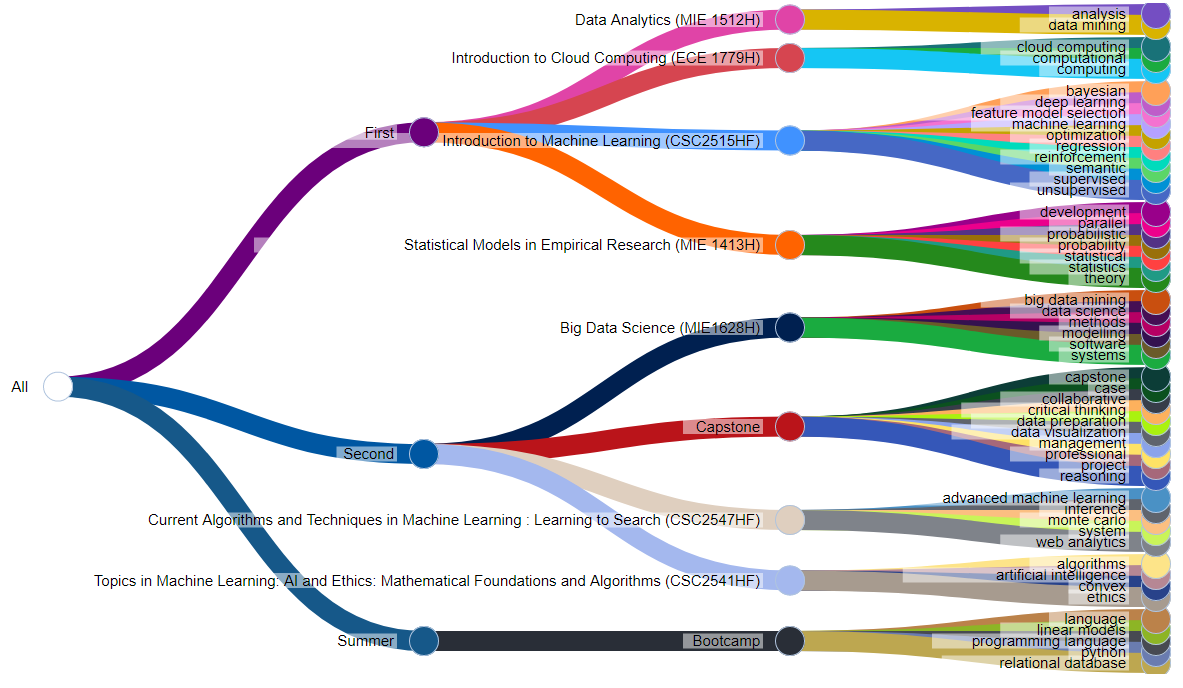

In [56]:
data_science = Image.open('data_science.PNG')
data_science

**Data Analyst Specialization:**

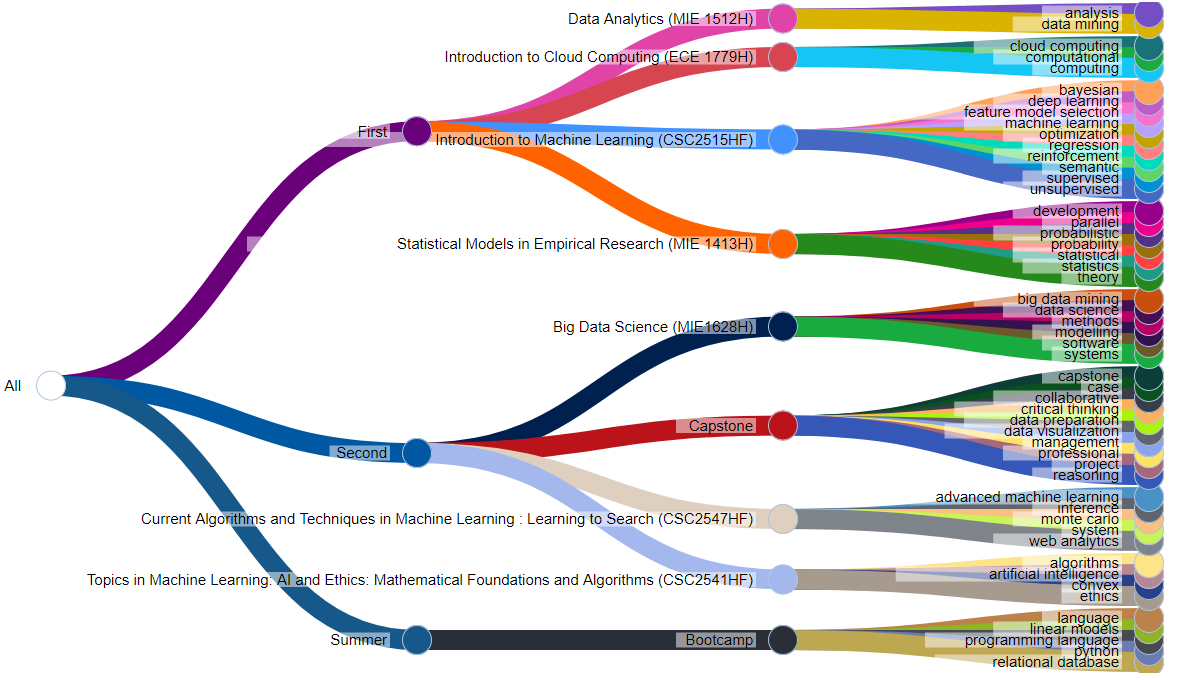

In [55]:
data_analyst = Image.open('data_analyst.PNG')
data_analyst

## Part 3 - Education Technology Company

In this section we establish the foundation of our Education Technology Startup. As a first step, we developed a course and/or program recommender to help the students on finding the most proper courses required by different job positions in Data Science and AI industry. 

**Method**: The most important parts providing helpful information about the courses and jobs, are courses and jobs descriptions. In our developed platform, we use this key and find the most relevant courses by determining how similar the job and the courses descriptions are. The most relevant course that is required for a job, has the most similar description to the selected job description. Therefore, we assign each course a score, based on how similar the course description is to the job description, and then sort the courses according to the scores. Finally, the most proper courses are the highest ones in the list.

Additionally, we take into account the skills that the students believe that they already have, in the course recommending process. To this end, users can enter those skills at the beginning of the process. Having listed the most proper courses, we check the similarity of each of their descriptions with the entered skills, and assign each of them another score based on how similar they are to the users skillset. At the end, we provide the user with the list of courses prioritized according to the second assigned scores. 

After running this piece of code, the users not only get the most relevant courses required to obtain an specific job, but also have the course list prioritized based in their background skillset.



In [0]:
#----------------------------------------------
# Import Libraries
#----------------------------------------------

import pandas 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#### User Interface
In this part, through the following cells, the user / student communicates with the developed framework as follows:
-	First, the users choose the desired job by specifying the number of that job posting in the job database. 
-	After choosing the job, and reading the job description, the user may notice that he/she has already some of the related skills and may not be willing to take courses focusing on those skills. So, in the second section the users are able to enter all the skills they have some experience in.
-	Finally, users can enter maximum number of courses they are open to take and the framework will recommend the maximum number of proper courses according to this section.


In [59]:
choosenJobNumber = input("Please Enter the row number of your selected job")
print(choosenJobNumber)

Please Enter the row number of your selected job5
5


In [60]:
skillsList = input("Enter a list numbers or elements separated by space: ")
print("skill-sets that you already have are:", skillsList)

Enter a list numbers or elements separated by space: neural network
skill-sets that you already have are: neural network


In [61]:
MaxCourseNumber = input("Please Enter the maximum number of courses you are open to take")
print(MaxCourseNumber)

Please Enter the maximum number of courses you are open to take5
5


#### Data Loading

To start with the process of recommending courses, we first need to have the related databases prepared - which were prepared and cleaned within the previous sections. In the following cells we load the related databases, create the dataframes, and visualize them.

In [0]:
jobData = pandas.read_csv('jobs2.csv')
courseData = pandas.read_csv('courses.csv')

In [63]:
jobData.head()

,Unnamed: 0,Unnamed: 0.1,company,job location,job_title,job description
0,0,2,Xpert Staffing,"Atlanta, GA",data scientist,located atlanta ga area currently add data sci...
1,1,3,Operation HOPE,"Atlanta, GA 30303",data analyst,department program operationsposition location...
2,2,4,Emory University,"Atlanta, GA",data scientist,description emory university department biomed...
3,3,9,KPMG,"Atlanta, GA 30338",data scientist,place kpmg audit tax advisory organizations to...
4,4,12,KPMG,"Atlanta, GA 30338",data scientist,innovate collaborate shine lighthouse kpmg cen...


In [64]:
courseData.head()

,Unnamed: 0,University,Program name,Course,Course description,Intended Job,Program link:
0,0,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
1,1,MIT,Master of Business Analytics,The Analytics Edge,examines data analytics transform businesses i...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
2,2,MIT,Master of Business Analytics,Statistical Learning and Data Mining,introduction theory statistics data mining mac...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
3,3,MIT,Master of Business Analytics,Prediction: Machine Learning and Statistics,practical theoretical foundation machine learn...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...
4,4,MIT,Master of Business Analytics,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,Data Analyst,http://mitsloan.mit.edu/master-of-business-ana...


#### Creating a Single Dataframe

Having the Course and Job databases loaded separately, we will select the important columns to mix two databases into one dataframe. 
The most important columns which provide helpful information about both courses and jobs, are 'Course Description' and 'Job Description' respectively. Then, we add the hyperlink of each course to make it easier for the users to find them. 

In [0]:
jobDescriptions = jobData['job description']
courses = courseData['Course']
courseDescriptions = courseData['Course description']
programLinks = courseData['Program link:']

In [0]:
import pandas as pd

df = pd.DataFrame(list(zip(jobDescriptions, courses, courseDescriptions, programLinks)), columns = ['jobDescription', 'courseName', 'courseDescription', 'Program link:'])
df["Score"] = ""

In [67]:
df.head(10)

,jobDescription,courseName,courseDescription,Program link:,Score
0,located atlanta ga area currently add data sci...,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,http://mitsloan.mit.edu/master-of-business-ana...,
1,department program operationsposition location...,The Analytics Edge,examines data analytics transform businesses i...,http://mitsloan.mit.edu/master-of-business-ana...,
2,description emory university department biomed...,Statistical Learning and Data Mining,introduction theory statistics data mining mac...,http://mitsloan.mit.edu/master-of-business-ana...,
3,place kpmg audit tax advisory organizations to...,Prediction: Machine Learning and Statistics,practical theoretical foundation machine learn...,http://mitsloan.mit.edu/master-of-business-ana...,
4,innovate collaborate shine lighthouse kpmg cen...,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,http://mitsloan.mit.edu/master-of-business-ana...,
5,cotiviti data scientist revolution healthcare ...,Communicating with Data,equips students strategies tactics quantitativ...,http://mitsloan.mit.edu/master-of-business-ana...,
6,data scientist summary amazon web aws premier ...,Machine Learning Under a Modern Optimization L...,develops algorithms central problems machine l...,http://mitsloan.mit.edu/master-of-business-ana...,
7,drivers arby business order strategies data sc...,Supervised Learning I,introduction supervised machine learning class...,https://masterdatascience.ubc.ca/programs/vanc...,
8,data science analytics team norfolk southern c...,Databases and Data Retrieval,data stored relational database storage struct...,https://masterdatascience.ubc.ca/programs/vanc...,
9,purpose data scientist leverages technical abi...,Feature and Model Selection,evaluate select features models cross validati...,https://masterdatascience.ubc.ca/programs/vanc...,


#### Vectorizing and Similarity

In this part, we need to first vectorize the selected job and all courses descriptions. To do this, we use TF-IDF method. After vectorozing each of the strings we can use "Cosine Similarity Method" to determine the similarity of each of course descriptions with the selected job description.

The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we are not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents

In [0]:
choosenJobNumber = int(choosenJobNumber)

In [0]:
ChoiceDocuments = df['courseDescription'].tolist()
ChoiceDocuments.insert(0,df.iloc[choosenJobNumber]['jobDescription'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(ChoiceDocuments)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = (cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)[0])[1:]

In [0]:
df['Score'] = similarity

In [73]:
df.head()

,jobDescription,courseName,courseDescription,Program link:,Score
0,located atlanta ga area currently add data sci...,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,http://mitsloan.mit.edu/master-of-business-ana...,0.052522
1,department program operationsposition location...,The Analytics Edge,examines data analytics transform businesses i...,http://mitsloan.mit.edu/master-of-business-ana...,0.135476
2,description emory university department biomed...,Statistical Learning and Data Mining,introduction theory statistics data mining mac...,http://mitsloan.mit.edu/master-of-business-ana...,0.068861
3,place kpmg audit tax advisory organizations to...,Prediction: Machine Learning and Statistics,practical theoretical foundation machine learn...,http://mitsloan.mit.edu/master-of-business-ana...,0.050611
4,innovate collaborate shine lighthouse kpmg cen...,Optimization Methods in Business Analytics,introduces optimization modeling solution tech...,http://mitsloan.mit.edu/master-of-business-ana...,0.052522


As it is shown above, a specific score has been assigned to each course.

#### Ranking proper courses

According to the calculated scores, the courses are ranked based on their similarity to the selected job description and listed for the user.

In [74]:
MaxCourseNumber = int(MaxCourseNumber)
df = df.sort_values(by = 'Score', ascending=False)
df.drop(df.tail(df.shape[0] - MaxCourseNumber).index,inplace=True)
df = df.drop(['jobDescription'], axis=1)
df = df.drop(['Score'], axis=1)

print("Recommended Courses in terms of being relevant are: ")
df.head(MaxCourseNumber)

Recommended Courses in terms of being relevant are: 


,courseName,courseDescription,Program link:
44,Introduction to Enterprise Analytics,introduces enterprise data analytics defined e...,NaN
229,Big Data Analytics,course cover data architectures hadoop ecosyst...,https://smith.queensu.ca/grad_studies/mma/prog...
186,ANALYTICS FOR BIG DATA,course covers topics data topics hadoop ecosys...,https://www.mccormick.northwestern.edu/analyti...
109,Data Analysis Using R,r open source software project extensive libra...,http://jacobsschool.ucsd.edu/mas/dse/curriculu...
251,Analytics Tools and Techniques,data querying reporting data management data c...,https://analytics.ncsu.edu/?page_id=123


#### Prioritizing based on the skills

In this section, we prioritize the listed courses based on the background and current skillset of the users that declared by them at the very beginning of the process. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

PriorDocuments = df['courseDescription'].tolist()
PriorDocuments.insert(0,skillsList)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(PriorDocuments)


In [0]:
from sklearn.metrics.pairwise import cosine_similarity

priority = (cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)[0])[1:]
df['priorityScore'] = priority

In [77]:
df = df.sort_values(by = 'priorityScore', ascending=True)
df = df.drop(['priorityScore'], axis=1)

print("Recommended Courses, in order of priorit,y considering the skills you already have: ")
df.head(MaxCourseNumber)

Recommended Courses, in order of priorit,y considering the skills you already have: 


,courseName,courseDescription,Program link:
44,Introduction to Enterprise Analytics,introduces enterprise data analytics defined e...,NaN
186,ANALYTICS FOR BIG DATA,course covers topics data topics hadoop ecosys...,https://www.mccormick.northwestern.edu/analyti...
109,Data Analysis Using R,r open source software project extensive libra...,http://jacobsschool.ucsd.edu/mas/dse/curriculu...
251,Analytics Tools and Techniques,data querying reporting data management data c...,https://analytics.ncsu.edu/?page_id=123
229,Big Data Analytics,course cover data architectures hadoop ecosyst...,https://smith.queensu.ca/grad_studies/mma/prog...


The list above presents courses which were selected based on how similar their content is to the desired job description and resposibilities, and prioritized according to the user background and skillset.
